## 2 этап. 
#### Черкасов Борис, студент 316 группы

#### 1) Применение критериев для проверки различных гипотез и различных доверительных уровней (0.9, 0.95, 0.99):
* Стьюдента(включая односторонние варианты, $H_0$: одно из сравниваемых 
средних значений больше (или меньше) другого.);
* Уилкоксона-Манна-Уитни(ранговые);
* Фишера, Левене, Бартлетта, Флигнера-Килина (гипотезы об однородности дисперсий)

*Оценка мощности критериев при заданном объеме выборки или определения объема выборки для достижения заданной мощности*

**$a)$ Критерий Стъюдента**

**Односторонний вариант критерия Стъюдента:**

Проверка нулевой гипотезы о равенстве среднего значения выборки некоторому заданному значению.

Требования к данным: нормальное распределение. 

Сгенерируем данные:

In [3]:
# Подключаем библиотеки
set.seed(42)

# Размер выборки
n <- 70

# Генерируем данные
samples <- list(
  rnorm(n, mean = 50, sd = 11),
  rnorm(n, mean = 55, sd = 10),
  rnorm(n, mean = 46, sd = 7),
  rnorm(n, mean = 49, sd = 7)
)

Пусть задано среднее значение: 52

Проверяем $H_0$: среднее значение выборки **больше, либо равно** 52

In [6]:
# Задаем среднее значение
mu <- 52

# Сравним 1 группу
sample1 <- samples[[1]]

# Проверяем среднее группы, равно ли оно заданному среднему
t.test(sample1, mu = mu, conf.level=0.9)
t.test(sample1, mu = mu, conf.level=0.95)
t.test(sample1, mu = mu, conf.level=0.99)


	One Sample t-test

data:  sample1
t = -0.9607, df = 69, p-value = 0.3401
alternative hypothesis: true mean is not equal to 52
90 percent confidence interval:
 48.15874 53.03276
sample estimates:
mean of x 
 50.59575 



	One Sample t-test

data:  sample1
t = -0.9607, df = 69, p-value = 0.3401
alternative hypothesis: true mean is not equal to 52
95 percent confidence interval:
 47.67973 53.51177
sample estimates:
mean of x 
 50.59575 



	One Sample t-test

data:  sample1
t = -0.9607, df = 69, p-value = 0.3401
alternative hypothesis: true mean is not equal to 52
99 percent confidence interval:
 46.72373 54.46777
sample estimates:
mean of x 
 50.59575 


_0.3401 > 0.1, следовательно не отклоняем нулевую гипотезу о том, что среднее не равно 52._

In [9]:
# Задаем среднее значение
mu <- 52

# Уровни значимости при уровнях доверия (0.9, 0.95, 0.99)
alpha_levels <- c(0.1, 0.05, 0.01)

# Сравним 1 группу
sample1 <- samples[[1]]

# Проверяем среднее группы с заданным значением
t.test(sample1, mu = mu, alternative='greater', conf.level=0.9)
t.test(sample1, mu = mu, alternative='greater', conf.level=0.95)
t.test(sample1, mu = mu, alternative='greater', conf.level=0.99)


	One Sample t-test

data:  sample1
t = -0.9607, df = 69, p-value = 0.83
alternative hypothesis: true mean is greater than 52
90 percent confidence interval:
 48.70439      Inf
sample estimates:
mean of x 
 50.59575 



	One Sample t-test

data:  sample1
t = -0.9607, df = 69, p-value = 0.83
alternative hypothesis: true mean is greater than 52
95 percent confidence interval:
 48.15874      Inf
sample estimates:
mean of x 
 50.59575 



	One Sample t-test

data:  sample1
t = -0.9607, df = 69, p-value = 0.83
alternative hypothesis: true mean is greater than 52
99 percent confidence interval:
 47.11453      Inf
sample estimates:
mean of x 
 50.59575 


Во всех трех случаях не отклоняем $H_0$(среднее не больше), поскольку **p_value** $> \alpha = $ $(0.1, 0.05, 0.01)$ во всех случаях

In [12]:
t.test(sample1, mu = mu, alternative='less', conf.level=0.9)
t.test(sample1, mu = mu, alternative='less', conf.level=0.95)
t.test(sample1, mu = mu, alternative='less', conf.level=0.99)


	One Sample t-test

data:  sample1
t = -0.9607, df = 69, p-value = 0.17
alternative hypothesis: true mean is less than 52
90 percent confidence interval:
     -Inf 52.48711
sample estimates:
mean of x 
 50.59575 



	One Sample t-test

data:  sample1
t = -0.9607, df = 69, p-value = 0.17
alternative hypothesis: true mean is less than 52
95 percent confidence interval:
     -Inf 53.03276
sample estimates:
mean of x 
 50.59575 



	One Sample t-test

data:  sample1
t = -0.9607, df = 69, p-value = 0.17
alternative hypothesis: true mean is less than 52
99 percent confidence interval:
     -Inf 54.07696
sample estimates:
mean of x 
 50.59575 


Во всех трех случаях отклоняем $H_0$, поскольку **p_value** $< \alpha = $ $(0.1, 0.05, 0.99)$ во всех случаях

_Теперь реализуем **оценку мощности критерия для одновыборочного теста**_:

In [16]:
# Устанавливаем пакет pwr
if (!require(pwr)) install.packages("pwr", dependencies = TRUE)

power.t.test(delta = 1, sd=2, n = n, sig.level = 0.1, type = "one.sample", alternative = "two.sided")
power.t.test(delta = 1, sd=2, n = n, sig.level = 0.05, type = "one.sample", alternative = "two.sided")
power.t.test(delta = 1, sd=2, n = n, sig.level = 0.01, type = "one.sample", alternative = "two.sided")

Loading required package: pwr

Warning message:
"package 'pwr' was built under R version 4.4.2"



     One-sample t test power calculation 

              n = 70
          delta = 1
             sd = 2
      sig.level = 0.1
          power = 0.9937367
    alternative = two.sided



     One-sample t test power calculation 

              n = 70
          delta = 1
             sd = 2
      sig.level = 0.05
          power = 0.9847848
    alternative = two.sided



     One-sample t test power calculation 

              n = 70
          delta = 1
             sd = 2
      sig.level = 0.01
          power = 0.93397
    alternative = two.sided


_Определим **необходимый объем** выборки для достижения заданной точности ***0.9***_:

In [19]:
# Заданная мощность
target_power = 0.9

# Вычисляем объем на каждом уровне значимости
power.t.test(delta = 1, sd=2, sig.level = 0.1, power=target_power, type = "one.sample", alternative = "two.sided")
power.t.test(delta = 1, sd=2, sig.level = 0.05, power=target_power,type = "one.sample", alternative = "two.sided")
power.t.test(delta = 1, sd=2, sig.level = 0.01, power=target_power, type = "one.sample", alternative = "two.sided")


     One-sample t test power calculation 

              n = 35.65268
          delta = 1
             sd = 2
      sig.level = 0.1
          power = 0.9
    alternative = two.sided



     One-sample t test power calculation 

              n = 43.99552
          delta = 1
             sd = 2
      sig.level = 0.05
          power = 0.9
    alternative = two.sided



     One-sample t test power calculation 

              n = 62.87024
          delta = 1
             sd = 2
      sig.level = 0.01
          power = 0.9
    alternative = two.sided


**Двусторонний вариант критерия Стъюдента для двух независимых выборок**:

**Требование к данным**: *нормальность распределения, данные независимы и дисперсии выборок совпадают*

$H_0$: средние двух выборок совпадают.

Проведем тест на 3 и 4 выборках:

In [22]:
# Выделяем 3 и 4 выборки 
sample3 <- samples[[2]]
sample4 <- samples[[3]]

# Двусторонний тест Стъюдента
t.test(sample3, sample4, conf.level=0.9)
t.test(sample3, sample4, conf.level=0.95)
t.test(sample3, sample4, conf.level=0.99)


	Welch Two Sample t-test

data:  sample3 and sample4
t = 6.5127, df = 121.72, p-value = 1.74e-09
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
  6.566148 11.049250
sample estimates:
mean of x mean of y 
 54.13141  45.32371 



	Welch Two Sample t-test

data:  sample3 and sample4
t = 6.5127, df = 121.72, p-value = 1.74e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  6.130439 11.484960
sample estimates:
mean of x mean of y 
 54.13141  45.32371 



	Welch Two Sample t-test

data:  sample3 and sample4
t = 6.5127, df = 121.72, p-value = 1.74e-09
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
  5.268722 12.346677
sample estimates:
mean of x mean of y 
 54.13141  45.32371 


***Вывод***: во всех случаях ***p_value*** $ > \alpha = (0.1, 0.05, 0.01) \implies $ не отклоняем $H_0$: не приходится говорить о разнице средних

_Теперь реализуем **оценку мощности критерия для двухвыборочного теста**_:

In [26]:
# Устанавливаем пакет pwr
if (!require(pwr)) install.packages("pwr", dependencies = TRUE)

# Эффект размера (разница средних в стандартных отклонениях)
pooled_sd <- sqrt((var(sample3) + var(sample4)) / 2)
effect_size <- (mean(sample3) - mean(sample4)) / pooled_sd

# Оценка мощности
pwr.t.test(d = effect_size, n = n, sig.level = 0.1, type = "two.sample", alternative = "two.sided")
pwr.t.test(d = effect_size, n = n, sig.level = 0.05, type = "two.sample", alternative = "two.sided")
pwr.t.test(d = effect_size, n = n, sig.level = 0.01, type = "two.sample", alternative = "two.sided")


     Two-sample t test power calculation 

              n = 70
              d = 1.100842
      sig.level = 0.1
          power = 0.9999993
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 70
              d = 1.100842
      sig.level = 0.05
          power = 0.9999967
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 70
              d = 1.100842
      sig.level = 0.01
          power = 0.9999428
    alternative = two.sided

NOTE: n is number in *each* group


_Определим **необходимый объем** выборки для достижения заданной точности ***0.9***_:

In [29]:
# Заданная мощность
target_power <- 0.9

# Вычисляем объем выборки на каждом уровне значимости
pwr.t.test(d = effect_size, power = target_power, sig.level = 0.1, type = "two.sample")
pwr.t.test(d = effect_size, power = target_power, sig.level = 0.05, type = "two.sample")
pwr.t.test(d = effect_size, power = target_power, sig.level = 0.01, type = "two.sample")


     Two-sample t test power calculation 

              n = 14.86199
              d = 1.100842
      sig.level = 0.1
          power = 0.9
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 18.35689
              d = 1.100842
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 26.26899
              d = 1.100842
      sig.level = 0.01
          power = 0.9
    alternative = two.sided

NOTE: n is number in *each* group


**$b)$ Уилкоксона-Манна-Уитни**

*Непараметрический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-нибудь признака.*

**Требования**: в каждой из выборок должно быть не менее 3 значений признака, в выборочных данных не должно быть совпадений, все значения уникальные, либо их очень мало(незавсимость априори).

В качестве данных возьму предыдущий датасет про **спортсменов** из предыдущего этапа. [Ссылка на датасет](https://www.kaggle.com/datasets/muhammadehsan02/126-years-of-historical-olympic-dataset/data). 

In [49]:
# Путь к файлу
data_file_path <- "../all_datasets/Olympic_Athlete_Biography.csv"

# Чтение первых 30000 строк
df <- read.csv(data_file_path, nrows = 30000, stringsAsFactors = FALSE)

# Удаление строк с пропусками
df <- na.omit(df)

# Удаление строк, где 'weight' содержит "-"
df <- df[!grepl("-", df$weight), ]

# Преобразование столбца 'weight' в числовой тип
df$weight <- as.numeric(df$weight)

Warning message:
"NAs introduced by coercion"


In [51]:
# Удаление пробелов в начале и конце строк
df$country <- trimws(df$country)

# Уникальные страны
unique_countries <- unique(df$country)
print(unique_countries)

# Подсчет количества спортсменов из каждой страны
country_counts <- table(df$country)
# print(country_counts)

  [1] "Bulgaria"                                                                      
  [2] "Russian Federation"                                                            
  [3] "Qatar"                                                                         
  [4] "Canada"                                                                        
  [5] "Switzerland"                                                                   
  [6] "Republic of Korea"                                                             
  [7] "Portugal"                                                                      
  [8] "France"                                                                        
  [9] "Luxembourg"                                                                    
 [10] "Japan"                                                                         
 [11] "Netherlands"                                                                   
 [12] "Hungary"                            

Возьмем всех спортсменов из **Италии и Великобритании** и их веса и проверим гипотезу о равенстве средних рангов весов спортсменов.

$H_0$: Распределения весов спортсменов из Италии и Великобритании не отличаются. Средние ранги весов равны.

In [52]:
# Формируем выборки
IT_group <- df$weight[df$country == "Italy"]
GB_group <- df$weight[df$country == "Great Britain"]

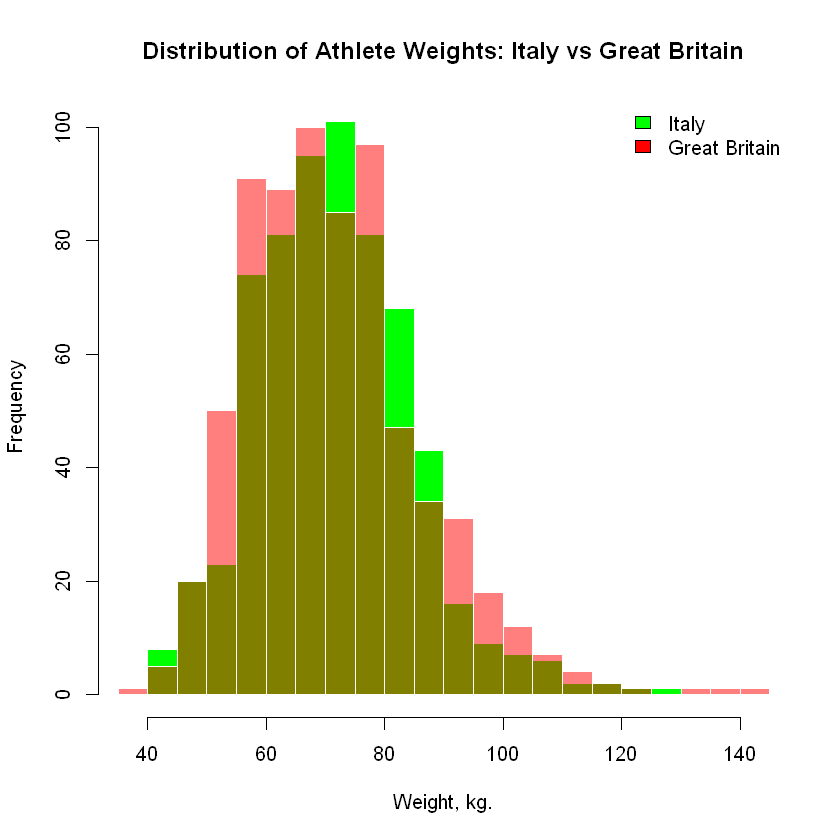

In [57]:
# Убедимся, что данные не содержат NA и NaN
IT_group <- na.omit(IT_group)
GB_group <- na.omit(GB_group)

# Определим диапазон для xlim
x_range <- range(c(IT_group, GB_group), na.rm = TRUE)

# Построим гистограммы выборок весов спортсменов из Италии и Великобритании
hist(IT_group, breaks = 20, col = "green", border = "white", 
     main = "Distribution of Athlete Weights: Italy vs Great Britain", 
     xlab = "Weight, kg.", xlim = x_range, freq = TRUE, 
     ylim = c(0, max(
       hist(IT_group, breaks = 20, plot = FALSE)$counts, 
       hist(GB_group, breaks = 20, plot = FALSE)$counts)))
     
hist(GB_group, breaks = 20, col = rgb(1, 0, 0, alpha = 0.5), border = "white", 
     add = TRUE)

legend("topright", legend = c("Italy", "Great Britain"), fill = c("green", "red"), bty = "n")

In [58]:
# Тест Уилкоксона-Манна-Уитни для разных уровней значимости
wilcox.test(IT_group, GB_group, conf.level = 0.9, alternative = "two.sided")
wilcox.test(IT_group, GB_group, conf.level = 0.95, alternative = "two.sided")
wilcox.test(IT_group, GB_group, conf.level = 0.99, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  IT_group and GB_group
W = 231290, p-value = 0.2034
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  IT_group and GB_group
W = 231290, p-value = 0.2034
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  IT_group and GB_group
W = 231290, p-value = 0.2034
alternative hypothesis: true location shift is not equal to 0


**Вывод**: по результату теста ***p_value*** $ > \alpha = (0.1, 0.05, 0.01) \implies $ не отклоняем $H_0$: не можем говорить о том, что распределения весов из Италии и Великобритании отличаются, т.е. средние рангов не отличаются. Да, на гистограмме можно заметить, что есть отличия между значениями весов, но смещения центров распределений не такое значительное, соответственно можно сделать вывод, что статистически данные не сильно различаются.  

**$c)$ Фишера, Левене, Бартлетта, Флигнера-Килина (проверка 
гипотез об однородности дисперсий)**

**Все критерии используются для проверки гипотезы о равенстве дисперсий**

***Критерий Фишера*** - проверка на равенство дисперсий.

***Требования к данным:*** нормальное распределение

Возьмем изначальные 2 и 3 группы.

При реализации использовал данный источник: [F-Test](https://ru.wikipedia.org/wiki/F-тест)

In [59]:
sample3 = samples[[2]]
sample2 = samples[[1]]

# Проведение теста Фишера для равенства дисперсий
var.test(sample2, sample3, conf.level=0.9)
var.test(sample2, sample3, conf.level=0.95)
var.test(sample2, sample3, conf.level=0.99)


	F test to compare two variances

data:  sample2 and sample3
F = 1.7108, num df = 69, denom df = 69, p-value = 0.02718
alternative hypothesis: true ratio of variances is not equal to 1
90 percent confidence interval:
 1.148175 2.549065
sample estimates:
ratio of variances 
          1.710782 



	F test to compare two variances

data:  sample2 and sample3
F = 1.7108, num df = 69, denom df = 69, p-value = 0.02718
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.063032 2.753232
sample estimates:
ratio of variances 
          1.710782 



	F test to compare two variances

data:  sample2 and sample3
F = 1.7108, num df = 69, denom df = 69, p-value = 0.02718
alternative hypothesis: true ratio of variances is not equal to 1
99 percent confidence interval:
 0.9134702 3.2040175
sample estimates:
ratio of variances 
          1.710782 


**Вывод:** Отклоняем $H_0$ во всех случаях, дисперсии отличаются

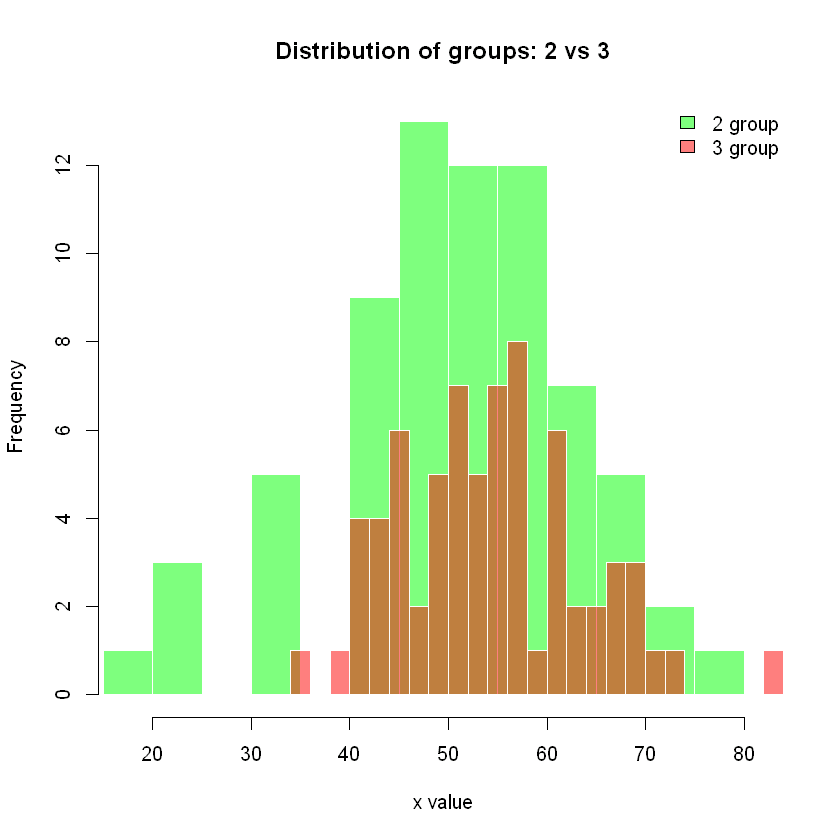

In [60]:
# Построим гистограммы для выборок 2 и 3
hist(sample2, breaks = 20, col = rgb(0, 1, 0, 0.5), border = "white", 
     main = "Distribution of groups: 2 vs 3", 
     xlab = "x value", xlim = range(c(sample2, sample3)), freq = TRUE, 
     ylim = c(0, max(
       hist(sample2, breaks = 20, plot = FALSE)$counts, 
       hist(sample3, breaks = 20, plot = FALSE)$counts)))

hist(sample3, breaks = 20, col = rgb(1, 0, 0, 0.5), border = "white", 
     add = TRUE)

legend("topright", legend = c("2 group", "3 group"), fill = c(rgb(0, 1, 0, 0.5), rgb(1, 0, 0, 0.5)), bty = "n")

***Критерий Левене***

_Проверяет равенство дисперсий, используя медиану как центр, что делает его более устойчивым к выбросам._

In [63]:
# Возьмем для разных стран из датасета спортсменов (см. выше) и проверим разные группы весов спортсемнов на равенство дисперсий

# Загружаем пакет car для критерия Левена
# install.packages("car")
library(car)

# Формируем выборки для каждой страны
IT_sample <- df[df$country == 'Italy', 'weight'] # Италия
GB_sample <- df[df$country == 'Great Britain', 'weight'] # Великобритания
AUS_sample <- df[df$country == 'Australia', 'weight'] # Австралия
USA_sample <- df[df$country == 'United States', 'weight'] # Штаты
HUN_sample <- df[df$country == 'Hungary', 'weight'] # Венгрия
GR_sample <- df[df$country == 'Germany', 'weight'] # Германия

# Собираем данные в датафрейм
df_samples <- data.frame(
  weight = c(IT_sample, GB_sample, AUS_sample, USA_sample, HUN_sample, GR_sample),
  country = rep(c("Italy", "Great Britain", "Australia", "United States", "Hungary", "Germany"), 
                times = c(length(IT_sample), length(GB_sample), length(AUS_sample), 
                         length(USA_sample), length(HUN_sample), length(GR_sample)))
)

In [62]:
leveneTest(weight ~ country, data = df_samples)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,4.12533,0.0009698544
,4412,NA,NA


_0.0009698544 << 0.1, соответственно отклоняем **нулевую гипотезу**._ Веса спортсменов разных стран статистически различаются.

***Критерий Бартлетта***

_**Требование**: Предпологается проверка гипотез на **нормальном распределении**, поэтому рекомендуется проверять наличие нормальности распределения, так как он очень сильно чувствителен к нарушению данного предположения_

_Модификация критерия Левене для проверки равенства дисперсий._

In [74]:
# Проверим нормальность распределения с помощью теста Шапиро-Уилка для каждой страны

print("Тест Шапиро-Уилка на нормальность распределений:")
print(shapiro.test(IT_sample))
print(shapiro.test(GB_sample))
print(shapiro.test(AUS_sample))
print(shapiro.test(USA_sample))
print(shapiro.test(HUN_sample))
print(shapiro.test(GR_sample))

# Видно, что гипотеза о нормальности распределений может быть отвержена, посольку p_values << alpha (0.1, 0.05, 0.01)
# Но все равно проведем тест для показательного результата

[1] "Тест Шапиро-Уилка на нормальность распределений:"

	Shapiro-Wilk normality test

data:  IT_sample
W = 0.98008, p-value = 1.255e-07


	Shapiro-Wilk normality test

data:  GB_sample
W = 0.96064, p-value = 1.006e-12


	Shapiro-Wilk normality test

data:  AUS_sample
W = 0.96789, p-value = 1.118e-10


	Shapiro-Wilk normality test

data:  USA_sample
W = 0.96765, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  HUN_sample
W = 0.9602, p-value = 9.694e-09


	Shapiro-Wilk normality test

data:  GR_sample
W = 0.96248, p-value = 6.052e-11



_По результатам теста можно сделать вывод о том, что распределене веса спортсменов из разных стран не является нормальным._

In [71]:
# Проводим тест Бартлетта 
bartlett.test(weight ~ country, data = df_samples)


	Bartlett test of homogeneity of variances

data:  weight by country
Bartlett's K-squared = 26.109, df = 5, p-value = 8.498e-05


_8.498e-05 << 0.1, следовательно отклоняем нулевую гипотезу._

In [80]:
# Проведем также тест на нормально распределенных данных (пример: на 1 и 2 группе из начала)

bartlett.test(list(samples[[1]], samples[[2]]))


	Bartlett test of homogeneity of variances

data:  list(samples[[1]], samples[[2]])
Bartlett's K-squared = 4.8795, df = 1, p-value = 0.02718


_**P_value** < 0,1, 0.05, но больше 0.01, значит на уровне значимости 0.01 мы не отвергаем нулевую гипотезу о гомогенности дисперий._

***Критерий Флигнера-Килина***

In [49]:
fligner.test(weight ~ country, data = df_samples)


	Fligner-Killeen test of homogeneity of variances

data:  weight by country
Fligner-Killeen:med chi-squared = 22.032, df = 5, p-value = 0.0005162


_0.0005162 << 0.1 -> отклоняем нулевую гипотезу._

#### 2) Корреляционные взаимосвязи в данных с помощью коэффициентов корреляции Пирсона, Спирмена, Кендалла

_**Корреляция Пирсона**_

_Измеряет линейную связь между данными. Требование: **нормальность распределения выборки**_

$H_0$: коэффициент корреляции отличен от нуля, нет зависимости между данными.

In [50]:
# Возьмем сгенерированные выборки sample1 и sample2 и проверим их связь
sample1 <- samples[[1]]
sample2 <- samples[[2]]

# Проводим корреляцию Пирсона
cor.test(sample1, sample2)


	Pearson's product-moment correlation

data:  sample1 and sample2
t = 1.306, df = 68, p-value = 0.196
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.08154699  0.37752229
sample estimates:
      cor 
0.1564243 


_Значение **p_value** > 0.1, соответственно не отклоняем нулевую гипотезу, коэффициент получился статистически значимым._

_**Корреляция Спирмена**_

_Основана на рангах, подходит для нелинейных монотонных связей и менее чувствительна к выбросам._

$H_0$: _Нет монотонной зависимости между данными._

Возьмем датасет про спортсменов и проверим корреляцию роста и веса.

In [51]:
# Посморим на датасет
head(df)

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,65649,Ivanka Bonova,Female,4 April 1949,166,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,
2,112510,Nataliya Uryadova,Female,15 March 1977,184,70,Russian Federation,RUS,,Listed in Olympians Who Won a Medal at the European Beach Volleyball Championships (1–0–0 2006 Den Haag gold)
3,114973,Essa Ismail Rashed,Male,14 December 1986,165,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asian Games (0–2–0 2006 Doha ATH silver: 10000 m; 2010 Guangzhou ATH silver: 10000 m)
7,133041,Vincent Riendeau,Male,13 December 1996,178,68,Canada,CAN,,"Listed in Olympians Who Won a Medal at the Summer Pan American Games (0–2–1 2015 Toronto DIV silver: synchronized platform; 2019 Lima DIV silver: synchronized platform, bronze: platform) Listed in Olympians Who Won a Medal at the World Aquatics Championships (0–1–0 2015 Kazan DIV silver: synchronized platform (mixed)) Listed in Olympians Who Won a Medal at the British Empire/Commonwealth Games (0–0–2 2014 Glasgow DIV bronze: platform; 2018 Gold Coast DIV bronze: platform)"
8,110425,Tanja Morel,Female,4 October 1975,164,58,Switzerland,SUI,,Listed in Olympians Who Won a Medal at the European Bob & Skeleton Championships (0–0–2 2003 Winterberg bronze: Skeleton; 2006 St. Moritz bronze: Skeleton)
9,110705,Maksim Shabalin,Male,25 January 1982,183,76,Russian Federation,RUS,,Listed in Olympians Who Won a Medal at the European Figure Skating Championships (2–1–0 2007 Warszawa silver: ice dancing; 2008 Zagreb gold: ice dancing; 2010 Tallinn gold: ice dancing) Listed in Olympians Who Won a Medal at the World Figure Skating Championships (1–0–0 2009 Los Angeles gold: ice dancing)


In [52]:
# Формируем выборки роста и веса
df_weights <- df$weight
df_heights <- df$height

In [53]:
# Выполняет корреляцию Спирмена
cor.test(df_weights, df_heights, method='spearman')

Warning message in cor.test.default(df_weights, df_heights, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  df_weights and df_heights
S = 2.4839e+11, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8138474 


_Отвергаем нулевую гипотезу._

Проверим связь идентификатора атлета и его ростом.

In [54]:
# Корреляция Спирмена для id атлета и его роста
cor.test(df$athlete_id, df_heights, method='spearman')

Warning message in cor.test.default(df$athlete_id, df_heights, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  df$athlete_id and df_heights
S = 1.3503e+12, p-value = 0.1186
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01103274 


_Коэффициент корреляции статистически значимый. Не отклоняем нулевую гипотезу._

In [55]:
# Пример на первых выборках с нормальным распределением
cor.test(sample1, sample2, method='spearman')


	Spearman's rank correlation rho

data:  sample1 and sample2
S = 48374, p-value = 0.2037
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1536349 


_Не отвергаем нулевую гипотезу_

_**Корреляция Кендалла**_

_Анализирует согласованность рангов между двумя переменными. В основном используется для малых выборок и устойчива к выбросам._

$H_0$: _Нет согласованности рангов между переменными._

In [60]:
# Вызываем функцию с методом kendall
cor.test(df_heights, df_weights, method='kendall')


	Kendall's rank correlation tau

data:  df_heights and df_weights
z = 131.77, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.6375541 


_Отклоняем нулевую гипотезу_

In [61]:
# Пример на первых выборках с нормальным распределением
cor.test(sample1, sample2, method='kendall')


	Kendall's rank correlation tau

data:  sample1 and sample2
z = 1.1407, p-value = 0.254
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.0931677 


_Не отклоняем нулевую гипотезу._

#### 3) Методы хи-квадрат, точного теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля 

**_Хи-квадрат._**

_Непараметрический метод для проверки независимости категориальных данных._

_Проверим статистическую зависимость между полом спортсменов и их страной_

$H_0$: _нет статистической значимой зависимости между данными._

In [5]:
# Загрузка необходимых пакетов
library(dplyr)
library(tidyr)
library(stats)

# Хи-квадрат тест для первой таблицы
contingency_table <- table(df$sex, df$country)
chi2_test <- chisq.test(contingency_table)
print(chi2_test)

Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 1071.3, df = 347, p-value < 2.2e-16



_Вывод получился статистически значимым, соответственно можно отклонить нулевую гипотезу об отсутствии связи между полом спортсмена и его страной._

_В итоге между полом и страной атлета есть статистическая значимая зависимость_

_Возьмем другой пример: датасет о фильмах за 2024 год с разной информацией(название фильма, id, год выпуска, рейтинг, жанр и др.)_

[Ссылка на датасет](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies)

In [21]:
# Загружаем датасет и удаляем пропуски
movie_df <- read.csv('../all_datasets/TMDB_movie_dataset_v11.csv', nrows=10000) %>% drop_na()

In [22]:
# Смотрим информацию про столбцы
summary(movie_df)
str(movie_df)

       id             title            vote_average     vote_count   
 Min.   :      2   Length:10000       Min.   :2.098   Min.   :  256  
 1st Qu.:  10164   Class :character   1st Qu.:6.100   1st Qu.:  398  
 Median :  36563   Mode  :character   Median :6.649   Median :  714  
 Mean   : 180969                      Mean   :6.624   Mean   : 1768  
 3rd Qu.: 339528                      3rd Qu.:7.201   3rd Qu.: 1707  
 Max.   :1140066                      Max.   :9.172   Max.   :34495  
    status          release_date          revenue             runtime     
 Length:10000       Length:10000       Min.   :0.000e+00   Min.   :  0.0  
 Class :character   Class :character   1st Qu.:0.000e+00   1st Qu.: 93.0  
 Mode  :character   Mode  :character   Median :9.498e+06   Median :103.0  
                                       Mean   :6.433e+07   Mean   :105.2  
                                       3rd Qu.:5.747e+07   3rd Qu.:116.0  
                                       Max.   :2.924e+09   M

'data.frame':	10000 obs. of  24 variables:
 $ id                  : int  27205 157336 155 19995 24428 293660 299536 550 118340 680 ...
 $ title               : chr  "Inception" "Interstellar" "The Dark Knight" "Avatar" ...
 $ vote_average        : num  8.36 8.42 8.51 7.57 7.71 ...
 $ vote_count          : int  34495 32571 30619 29815 29166 28894 27713 27238 26638 25893 ...
 $ status              : chr  "Released" "Released" "Released" "Released" ...
 $ release_date        : chr  "2010-07-15" "2014-11-05" "2008-07-16" "2009-12-15" ...
 $ revenue             : num  8.26e+08 7.02e+08 1.00e+09 2.92e+09 1.52e+09 ...
 $ runtime             : int  148 169 152 162 143 108 149 139 121 154 ...
 $ adult               : chr  "False" "False" "False" "False" ...
 $ backdrop_path       : chr  "/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg" "/pbrkL804c8yAv3zBZR4QPEafpAR.jpg" "/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg" "/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg" ...
 $ budget              : int  160000000 165000000 185000000 2370000

In [25]:
if (!require("dplyr")) install.packages("dplyr")
library(dplyr)

if (!require("tidyr")) install.packages("tidyr")
library(tidyr)

# Проверим пропуски
movie_df <- movie_df %>% drop_na()
colSums(is.na(movie_df))

id                title         vote_average 
                   0                    0                    0 
          vote_count               status         release_date 
                   0                    0                    0 
             revenue              runtime                adult 
                   0                    0                    0 
       backdrop_path               budget             homepage 
                   0                    0                    0 
             imdb_id    original_language       original_title 
                   0                    0                    0 
            overview           popularity          poster_path 
                   0                    0                    0 
             tagline               genres production_companies 
                   0                    0                    0 
production_countries     spoken_languages             keywords 
                   0                    0                    0

Проверим статистическую связь между названием фильма и его жанрами.

In [27]:
# Создадим таблицу сопряженности для категориальных переменных (название и жанры)
# Хи-квадрат тест для названия и жанров фильмов
contingency_table_movies <- table(movie_df$title, movie_df$genres)
chi2_test_movies <- chisq.test(contingency_table_movies)
print(chi2_test_movies)

Warning message in chisq.test(contingency_table_movies):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table_movies
X-squared = 20540024, df = 20615639, p-value = 1



_Между названием фильма и его жанрами не существует статистически значимой зависимости_

**_Точный тест Фишера._**

_Проверка независимости для малых выборок._ Обычно используется на матрице сопряженности 2x2

_Возьмем такой пример: Пусть у нас есть два фильма: **(Interstellar и The Avengers)** и языками **(Russian и English)**, где значения - это сколько раз был упомянут фильм на том или ином языке, их смоделируем случайным образом._

$H_0$: _нет статистической зависимости между фильмом и языком, упоминавшем его._

In [30]:
# Тест Фишера
movies_by_language <- matrix(c(450, 520, 380, 400), nrow = 2,
                             dimnames = list(c("Interstellar", "The Avengers"),
                                             c("English", "Russian")))
# Проводим тест
fisher_test <- fisher.test(movies_by_language)
print(fisher_test)


	Fisher's Exact Test for Count Data

data:  movies_by_language
p-value = 0.3359
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.750828 1.105232
sample estimates:
odds ratio 
 0.9109807 



**_Тест МакНемара_**

__Для зависимых категориальных данных.__

*Смоделируем ситуацию: У нас есть новый диагностический тест (Тест B), который выявляет заболевание заболевание, и мы хотим проверить, насколько он это улучшает по сравнению со старым тестом (Тест A). Возьмем выборку из 100 пациентов и проводим два теста, сравнивая результаты с истинным диагнозом(известен заранее).*

$H_0$: _нет статистической зависимости(разницы) между тестами А и В, т.е. кол-во случаев, когда теста А верен, а тест В ошибается и наоборот, одинаково._

In [41]:
# Тест Макнемара
n_patients <- 100
set.seed(42)
data <- data.frame(
  True_Diagnosis = sample(c(TRUE, FALSE), n_patients, replace = TRUE),
  Test_A_Result = sample(c(TRUE, FALSE), n_patients, replace = TRUE),
  Test_B_Result = sample(c(TRUE, FALSE), n_patients, replace = TRUE)
)

# Формируем таблицу сопряженности
a <- sum(data$Test_A_Result & data$Test_B_Result)
b <- sum(data$Test_A_Result & !data$Test_B_Result)
c <- sum(!data$Test_A_Result & data$Test_B_Result)
d <- sum(!data$Test_A_Result & !data$Test_B_Result)

# Таблица сопряженности
mcnemar_table <- matrix(c(a, b, c, d), nrow = 2, byrow = TRUE)
dimnames(mcnemar_table) <- list('Test A Result' = c('TRUE', 'FALSE'),
                                'Test B Result' = c('TRUE', 'FALSE'))

# Печать таблицы сопряженности
print(mcnemar_table)

# Применяем тест Макнемара
mcnemar.test(mcnemar_table)

             Test B Result
Test A Result TRUE FALSE
        TRUE    26    19
        FALSE   29    26



	McNemar's Chi-squared test with continuity correction

data:  mcnemar_table
McNemar's chi-squared = 1.6875, df = 1, p-value = 0.1939


**_Тест Кохрана-Мантеля-Хензеля_**

_Для стратифицированных категориальных данных. Оценивает, сохраняется ли связь между переменными, если учитывать группы._

_Пусть у нас есть следующая ситуация: Собраны данные об очередности рождаемости ребенка, с наличием синдрома Дауна и без него. А также сведения о возрасте матери. Проверим с помощью теста статистическую зависимость между **очередностью рождения** и **наличием синдрома Дауна**, с учетом **возраста матери.**_

$H_0$: нет статистической зависимости.

In [38]:
# Тест Кохрана-Мантеля-Хензеля для возраста матери, очередности рождения и синдрома Дауна
data <- data.frame(
  Mother_Age_Group = factor(c('<30', '<30', '<30', '<30', '30-40', '30-40', '30-40', '30-40', '40+', '40+'),
                            levels = c('<30', '30-40', '40+')),
  Order_of_Birth = factor(c('1st', '2nd', '1st', '3rd', '2nd', '1st', '2nd', '3rd', '1st', '2nd'),
                          levels = c('1st', '2nd', '3rd')),
  Down_Syndrome = c(1, 0, 1, 0, 1, 0, 1, 0, 1, 0)
)

# Таблица сопряженности 
mantel_table <- xtabs(~ Order_of_Birth + Down_Syndrome + Mother_Age_Group, data = data) 
mantel_result <- mantelhaen.test(mantel_table) 
print(mantel_result)


	Cochran-Mantel-Haenszel test

data:  mantel_table
Cochran-Mantel-Haenszel M^2 = 2.3529, df = 2, p-value = 0.3084



#### 4) Наличие мультиколлинеарности в данных с помощью корреляционной матрицы и фактора инфляции дисперсии.

_Воьмем датасет про фильмы и проверим следующую гипотезу: отличаются ли средние рейтинги фильмов(`vote_average`) для двух языков(`original_language`): английский и французский._

$H_0$: _нет статистически значимой связи между данными._

In [42]:
# Уникальные значения в столбце original_language
unique(movie_df$original_language)

[1] "en" "ko" "fr" "ja" "it" "es" "pl" "pt" "hi" "tr" "da" "de" "cn" "id" "zh"
[16] "sv" "el" "ru" "sr" "fa" "th" "ar" "no" "nb" "fi" "te" "la" "nl" "hu" "he"
[31] "is" "ro" "gl" "uk" "eu" "et" "bs" "bn" "xx" "sh" "km" "cs" "tn" "ml"

In [43]:
# Тест Стьюдента для сравнения средних
en_movies <- movie_df %>% filter(original_language == "en") %>% pull(vote_average)
fr_movies <- movie_df %>% filter(original_language == "fr") %>% pull(vote_average)

t_test_result <- t.test(en_movies, fr_movies, var.equal = FALSE)
print(t_test_result)


	Welch Two Sample t-test

data:  en_movies and fr_movies
t = -2.9492, df = 762, p-value = 0.003283
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.16419493 -0.03296188
sample estimates:
mean of x mean of y 
 6.539707  6.638285 



_Построим корреляционную матрицу для числовых переменных: `vote_average`, `vote_count`, `budget`, `revenue`, `popularity`_

Loading required package: corrplot

corrplot 0.94 loaded



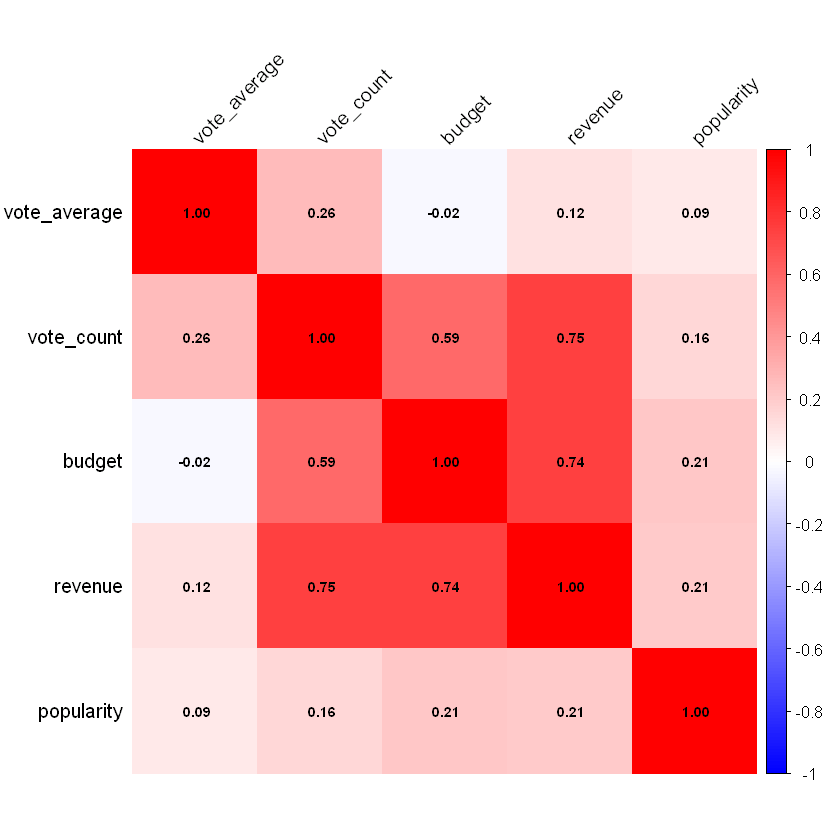

In [45]:
# Выбор числовых столбцов
numeric_cols <- c("vote_average", "vote_count", "budget", "revenue", "popularity")

# Корреляционная матрица
corr_matrix <- cor(movie_df[, numeric_cols], use = "complete.obs")

# Визуализация корреляционной матрицы
if (!require("corrplot")) install.packages("corrplot")
library(corrplot)

corrplot(corr_matrix, method = "color", col = colorRampPalette(c("blue", "white", "red"))(200), 
         addCoef.col = "black", tl.col = "black", tl.srt = 45, number.cex = 0.7)

1. По корреляционной матрице видно, что сильная корреляция между `budget` и `revenue`:
    * _Коэффициент корреляции равен примерно _**0.74**_._
    * _Это может говорить о том, что фильмы с высоким бюджетом, как правило обычно имеют более высокий доход._
2. Сильная корреляция между `vote_count` и `revenue`:
    * _Корреляция около **0.75**_.
    * _Это говорит о том, что фильмы с высоким доходом, как правило получают больше голосов, что логично, поскольку популярные фильмы чаще привлекают внимание зрителей_
3. Умеренная корреляция между `budget` и `vote_count`:
    * _Коэффициент равен **0.59**_.
    * _Следовательно, фильмы с большим бюджетом чаще имеют больше голосов, что может быть связано с их маркетингом или широкой аудиторией._
4. Слабая корреляция между `vote_average` и другими параметрами:
    * _Наибольшая корреляция у `vote_average` с `vote_count`. (**0.26**) -> средний рейтинг не сильно зависит от бюджета, популярности, дохода или числа голосов._
5. Слабая корреляция между `popularity` и другими параметрами:
    * _корреляция между `popularity` и `revenue` составляет около **0.21**_
    * _Популярность имеет слабую связь с доходом, бюджетом или числом голосов, что может быть связано с тем, что она отражает текущий интерес к фильму, а не его абсолютный успех._



***Фактор инфляции дисперсии (VIF):*** [VIF](https://en.wikipedia.org/wiki/Variance_inflation_factor)

_Он показывает, во сколько раз увеличивается дисперсия коэффициента регрессии из-за высокой корреляции данных._

* $VIF < 5$: Мультиколлинеарность не является проблемой.
* $5 <= VIF <= 10$: Наблюдается умереенная мультиколлинеарность.
* $VIF > 10$: Высокая мультиколлинеарность.  

_Рассчитаем **фактор инфляции дисперсии(VIF)** для числовых переменных_:

In [51]:
# Расчет VIF
if (!require("car")) install.packages("car")
library(car)

# Фактор инфляции дисперсии (VIF)
vif_data <- vif(lm(vote_average ~ ., data = movie_df[, numeric_cols]))
vif_result <- data.frame(Feature = names(vif_data), VIF = vif_data)

print("Фактор инфляции дисперсии (VIF):")
print(vif_result)

[1] "Фактор инфляции дисперсии (VIF):"
              Feature      VIF
vote_count vote_count 2.288036
budget         budget 2.268152
revenue       revenue 3.365644
popularity popularity 1.052466


* `vote_average`: $VIF \approx 1.26$
    * _Мультиколлинеарности практически нет._
* `vote_count`: $VIF \approx 2.29$
    * _Умеренная мультиколлинеарность, это не вызывает серьезных проблем._
* `budget`: $VIF \approx 2.26$
    * _Также умеренная мультиколлинеарность._
* `revenue`: $VIF \approx 3.36$
    * _Уровень мультиколлинеарности немного выше, но не критический._
* `popularity`: $VIF \approx 1.05$
    * _Мультиколлинеарность практически отсутствует_ 

**Вывод:** Значения VIF для всех переменных меньше 5, что указывает на отсутствие серьезной мультиколлинеарности в данных. Зависимость межлу предикторами слабые и не создают значимых искажений.

#### 5) Зависимости в данных с помощью дисперсионного анализа 

Когда речь идет о том, чтобы найти какие-нибудь зависимости в экспериментальных данных путем исследования значимости различий в средних значениях, то в таких случаях используют дисперсионный анализ.

**Типы дисперсионного анализа:**
* _однофакторный и многофакторный дисперсионный анализ (одна или несколько независимых переменных);_
* _одномерный и многомерный дисперсионный анализ (одна или несколько зависимых переменных);_
* _дисперсионный анализ с повторными измерениями (для зависимых выборок);_
* _дисперсионный анализ с постоянными факторами, случайными факторами, и смешанные модели с факторами обоих типов;_

**Рассмотрим каждый из данных типов.**

_P.S. Очень часто первые два типа пересекаются, что не будет исключением в данной работе..._

1. ***Однофакторный и многофакторный дисперсионный анализ***

***Однофакторный + одномерный***: _Анализируется влияние одного независимого фактора на зависимую переменную(может быть не одна)._

_Возьмем прошлый датасет про олимпийских спортсменов._ 

In [118]:
# Загружаем данные
library(dplyr)
library(tidyr)
library(ggplot2)
library(car)
library(nlme)
library(lme4)

data_file_path <- "../all_datasets/Olympic_Athlete_Biography.csv"

# Чтение первых 30000 строк и удаление пропусков
olymp_sport_df <- read.csv(data_file_path, nrows = 30000) %>%
  drop_na()

# Удаляем строки, где вес содержит "-"
olymp_sport_df <- olymp_sport_df[!grepl("-", olymp_sport_df$weight), ]

# Приведение столбца weight к числовому типу
olymp_sport_df$weight <- as.numeric(olymp_sport_df$weight)

olymp_sport_df$country <- gsub("''", "", olymp_sport_df$country)
olymp_sport_df$country <- trimws(olymp_sport_df$country)

# Уникальные страны
unique_countries <- unique(trimws(olymp_sport_df$country))
print(unique_countries)

# # Количество спортсменов по странам
# country_counts <- table(olymp_sport_df$country)
# print(country_counts)

Warning message:
"NAs introduced by coercion"


  [1] "Bulgaria"                                                                      
  [2] "Russian Federation"                                                            
  [3] "Qatar"                                                                         
  [4] "Canada"                                                                        
  [5] "Switzerland"                                                                   
  [6] "Republic of Korea"                                                             
  [7] "Portugal"                                                                      
  [8] "France"                                                                        
  [9] "Luxembourg"                                                                    
 [10] "Japan"                                                                         
 [11] "Netherlands"                                                                   
 [12] "Hungary"                            

In [62]:
head(olymp_sport_df)

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,65649,Ivanka Bonova,Female,4 April 1949,166,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,
2,112510,Nataliya Uryadova,Female,15 March 1977,184,70,Russian Federation,RUS,,Listed in Olympians Who Won a Medal at the European Beach Volleyball Championships (1–0–0 2006 Den Haag gold)
3,114973,Essa Ismail Rashed,Male,14 December 1986,165,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asian Games (0–2–0 2006 Doha ATH silver: 10000 m; 2010 Guangzhou ATH silver: 10000 m)
4,133041,Vincent Riendeau,Male,13 December 1996,178,68,Canada,CAN,,"Listed in Olympians Who Won a Medal at the Summer Pan American Games (0–2–1 2015 Toronto DIV silver: synchronized platform; 2019 Lima DIV silver: synchronized platform, bronze: platform) Listed in Olympians Who Won a Medal at the World Aquatics Championships (0–1–0 2015 Kazan DIV silver: synchronized platform (mixed)) Listed in Olympians Who Won a Medal at the British Empire/Commonwealth Games (0–0–2 2014 Glasgow DIV bronze: platform; 2018 Gold Coast DIV bronze: platform)"
5,110425,Tanja Morel,Female,4 October 1975,164,58,Switzerland,SUI,,Listed in Olympians Who Won a Medal at the European Bob & Skeleton Championships (0–0–2 2003 Winterberg bronze: Skeleton; 2006 St. Moritz bronze: Skeleton)
6,110705,Maksim Shabalin,Male,25 January 1982,183,76,Russian Federation,RUS,,Listed in Olympians Who Won a Medal at the European Figure Skating Championships (2–1–0 2007 Warszawa silver: ice dancing; 2008 Zagreb gold: ice dancing; 2010 Tallinn gold: ice dancing) Listed in Olympians Who Won a Medal at the World Figure Skating Championships (1–0–0 2009 Los Angeles gold: ice dancing)


_Выдвигаем гипотезу $H_0$: Страна не влияет на рост спортсмена._ Возьмем и сформируем следующие группы спортсменов из следующих стран: `United States `, `Canada`, `Germany`, `Great Britain`, `Italy`                                       

In [108]:
# Однофакторный ANOVA: влияние страны на рост
selected_countries <- c("United States", "Canada", "Germany", "Great Britain", "Italy")
filtered_df <- olymp_sport_df %>% filter(country %in% selected_countries)

anova_model <- aov(height ~ country, data = filtered_df)
anova_summary <- summary(anova_model)
print(anova_summary)

              Df Sum Sq Mean Sq F value   Pr(>F)    
country        4   2171   542.7   4.863 0.000653 ***
Residuals   4156 463798   111.6                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


_P.S То, что в residual значения равно NaN это нормально, потому что для остатков не проводится гипотезное тестирование, т.к. они не являются факторами. Заметим, что в данном случае был реализован и одномерный дисперсионный анализ(`height` - одна зависимая переменная и остальные факторы действуют на нее)_.

_По результатам анализа видно, что при $\alpha = (0.1, 0.05)$ у нас наблюдается влияние страны на рост, **мы отклоняем нулевую гипотезу** о том, что страна не влияет на рост спортсмена._

***Многофакторный***: _Анализируется влияние двух или более факторов на зависимую переменную, а также их взаимодействия._

_Для многофакторного добавим дополнительный факторы в группы из предыдущего однофакторного варианта с той же гипотезой._

**Дополнительные факторы**: _длина описания(`description_length`) и длина примечаний(`special_notes_description`), которая может свидетельствовать о какой-нибудь важной информации про спортсмена_.

In [113]:
# Фильтрация данных
# Преобразование текстовых признаков в числовые (длина текста)
filtered_df <- filtered_df %>%
  mutate(
    description_length = nchar(as.character(description)),
    special_notes_length = nchar(as.character(special_notes))
  )

# Двухфакторный ANOVA
anova_model_2 <- aov(height ~ country + sex + description_length + special_notes_length + country:sex, 
                     data = filtered_df)
anova_summary_2 <- summary(anova_model_2)
print(anova_summary_2)

                       Df Sum Sq Mean Sq  F value   Pr(>F)    
country                 4   2171     543    6.894 1.58e-05 ***
sex                     1 135085  135085 1716.056  < 2e-16 ***
description_length      1    500     500    6.350   0.0118 *  
special_notes_length    1   1447    1447   18.376 1.85e-05 ***
country:sex             4    164      41    0.519   0.7214    
Residuals            4149 326603      79                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


2. **Одномерный и многомерный дисперсионный анализ**.

***Одномерный***: _Одна зависимая переменная._ ***Был выполнен в 1 подпункте пункта 5, см. выше.***

***Многомерный***: Несколько зависимых переменных одновременно.

_Добавим еще одну зависимую переменную `weight`, дополнительные факторы оставляем те же, что и в многофакторном варианте._

In [116]:
# MANOVA
manova_model <- manova(cbind(height, weight) ~ country + sex + description_length + special_notes_length, 
                       data = filtered_df)
manova_summary <- summary(manova_model, test = "Wilks")
print(manova_summary)

                       Df   Wilks approx F num Df den Df    Pr(>F)    
country                 4 0.99058     4.92      8   8300 4.374e-06 ***
sex                     1 0.67844   983.50      2   4150 < 2.2e-16 ***
description_length      1 0.99646     7.38      2   4150 0.0006318 ***
special_notes_length    1 0.99554     9.30      2   4150 9.326e-05 ***
Residuals            4151                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


**Вывод:** По результатам анализа видно, что рост и вес спортсмена зависят от независимых переменных, следовательно мы отклоняем нулевую гипотезу о том, что нет статистически значимой связи между ними.

3. ***Дисперсионный анализ с повторными изменениями, постоянными факторами, случайными факторами, и смешанные модели с факторами обоих типов***

***Дисперсионный анализ с повторными изменениями***: Исследуются изменения одной и той же группы объектов во времени или при различных условиях.
***Дисперсионный анализ с постоянными факторами, случайными факторами, и смешанные модели с факторами обоих типов***:
* ***С постоянными факторами***: Уровни фактора фиксированы, исследование только их влияния.
* ***Случайные факторы***: Уровни выбираются случайно, выводы распространяются на всю генеральную совокопуность.
* **Смешанные модели**: Включатся как постоянные, так и случайные факторы.

**Возьмем следующий пример**: _Предположим, что у нас есть данные об эффективности двух методов тренировок на выносливость, где замеры проводились у тех же спортсменов в разные моменты времени (до тренировки и через месяц). Проверим: есть ли различия в результатах между методами тренировок с учетом повторных изменений?_

$H_0$: _различий нет, нет влияния методов и временных этапов на результаты._

1. Постоянные факторы: 
    * **Метод тренировки** - _2 уровня, фиксированный._
2. Случайные факторы:
    * **Спортсмен** _(случайный фактор), т.к. разные спортсмены могут иметь разные выносливости, независимо друг от друга._
3. Повторные изменения: 
    * **Время** _(измерения повторяются на одном и том же спортсмене с течением времени.)_

_Возьмем смешанную модель, которая включает все эти факторы._


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Result ~ Method + Time + (1 | Athlete)
   Data: df

REML criterion at convergence: 246.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1483 -0.4075 -0.1021  0.7853  1.9192 

Random effects:
 Groups   Name        Variance Std.Dev.
 Athlete  (Intercept)  0.2472  0.4972  
 Residual             36.3288  6.0273  
Number of obs: 40, groups:  Athlete, 10

Fixed effects:
               Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)     52.0803     1.6581 35.2329  31.409   <2e-16 ***
MethodMethod 2  -0.2414     1.9060 27.9999  -0.127    0.900    
TimeMonth 1     -1.3146     1.9060 27.9999  -0.690    0.496    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) MthdM2
MethodMthd2 -0.575       
TimeMonth 1 -0.575  0.000


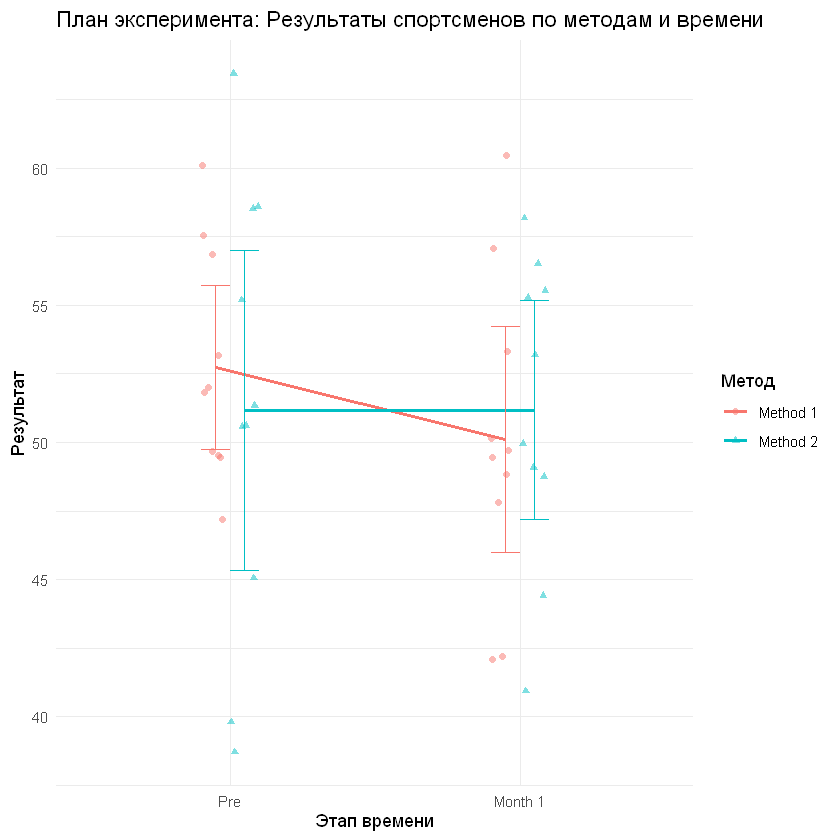

In [140]:
# install.packages("Hmisc")
# install.packages("lmerTest")

library(Hmisc)
library(lmerTest)
# Генерация данных для смешанной модели
set.seed(42)
athletes <- paste("Athlete", 1:10)
methods <- c("Method 1", "Method 2")
times <- c("Pre", "Month 1")

# Создаем DataFrame
df <- expand.grid(Athlete = athletes, Method = methods, Time = times)
df$Result <- with(df, 50 + ifelse(Method == "Method 2", 2, 0) + 
                      ifelse(Time == "Month 1", 1, 0) + 
                      rnorm(nrow(df), mean = 0, sd = 5))

# Смешанная линейная модель
mixed_model <- lmer(Result ~ Method + Time + (1 | Athlete), data = df)
summary_mixed_model <- summary(mixed_model)
print(summary_mixed_model)

# Визуализация
ggplot(df, aes(x = Time, y = Result, color = Method, group = Method)) +
  stat_summary(fun = mean, geom = "line", position = position_dodge(0.2), linewidth = 1) +
  stat_summary(fun.data = mean_cl_normal, geom = "errorbar", position = position_dodge(0.2), width = 0.2) +
  geom_jitter(aes(shape = Method), position = position_jitterdodge(jitter.width = 0.2, dodge.width = 0.2), alpha = 0.5) +
  labs(
    title = "План эксперимента: Результаты спортсменов по методам и времени",
    x = "Этап времени",
    y = "Результат",
    color = "Метод",
    shape = "Метод"
  ) +
  theme_minimal()

In [142]:
# lmer не предоставляет p_value, поэтому используем anova() и модуль lmerTest
anova_mixed_model <- anova(mixed_model)
print(anova_mixed_model)

Type III Analysis of Variance Table with Satterthwaite's method
       Sum Sq Mean Sq NumDF DenDF F value Pr(>F)
Method  0.583   0.583     1    28  0.0160 0.9001
Time   17.281  17.281     1    28  0.4757 0.4961


_Линии соединяют средние значения для каждого метода на двух временных этапах. Индивидуальные точки для спортсменов показывают разброс данных внутри групп. Доверительные интервалы на основе стандартного отклонения._

**Вывод:** По результатм анализа мы можем не отвергнуть нулевую гипотезу, т.е. есть нет статистически значимой связи между методами и временными этапами и результатами, так как $ Pr(>F) > \alpha$, следовательно нет влияния на результаты со стороны методов и временными этапами.

_В рамках данной модели можно сделать вывод о том, что 2 метод тренировки может давать более высокие результаты, но временные этапы не оказывают существенного влияния на результат._

#### 6) Подгонка регрессионых моделей(нелинейные) к данным, оценка качества подобной аппроксимации 

_Статистические методы исследования влияния одной или нескольких независимых переменных на зависимую_.

_Возьмем следующий датасет с данными про успеваемость учеников в двух португальских школах, содерщащий оценки учащихся, их демографические, социальные и другие, относящиеся к учебе признаки._

_Ссылка на датасет:_ [Student Performance Data Set](https://www.kaggle.com/datasets/larsen0966/student-performance-data-set)


Но прежде чем формулировать гипотезу, загрузим датасет и посмотрим на данные, чтобы лучше понять и сформулироваь гипотезу.

Цель: Построить простую модель линейной регрессии, но прежде чем ее построить, нужно учесть ее допущения, а именно:
* _Линейная связь между предикторами и целевой переменной;_
* _Нормальность остатков;_
* _Гомоскедастичность остатков(ранвомерное распределение ошибок);_
* _Отсутствие мультколлинеарности;_
* _Независимость остатков_

In [4]:
# Путь до файла
data_file_path <- "../all_datasets/Student_Performance.csv"

# Загружаем датасет
library(dplyr)
library(ggplot2)
library(car)
library(MASS)

student_df <- read.csv(data_file_path)

# Информация о данных
str(student_df)

'data.frame':	10000 obs. of  6 variables:
 $ Hours.Studied                   : int  7 4 8 5 7 3 7 8 5 4 ...
 $ Previous.Scores                 : int  99 82 51 52 75 78 73 45 77 89 ...
 $ Extracurricular.Activities      : chr  "Yes" "No" "Yes" "Yes" ...
 $ Sleep.Hours                     : int  9 4 7 5 8 9 5 4 8 4 ...
 $ Sample.Question.Papers.Practiced: int  1 2 2 2 5 6 6 6 2 0 ...
 $ Performance.Index               : num  91 65 45 36 66 61 63 42 61 69 ...


***Тест 1:***

_Подгоним простую модель линейной регрессии, используя в качестве целевой переменной: `Performance Index`(оценка успеваемости студента) и предиктора `Hours Studied`(часы, затраченные на учебу)._ 

_**Гипотеза состоит в том, чтобы проверить статистическую связь между предикторм и целевой переменной.**_

In [174]:
# Убираем лишние символы
student_df$Extracurricular.Activities <- trimws(student_df$Extracurricular.Activities)

# Преобразуем категориальную переменную в числовую
student_df$Extracurricular.Activities <- ifelse(student_df$Extracurricular.Activities == "Yes", 1, 0)

In [176]:
# Выбираем предиктор и целевую переменную
X <- student_df$Hours.Studied
y <- student_df$Performance.Index

# Строим модель OLS
model <- lm(Performance.Index ~ Hours.Studied, data = student_df)
summary(model)



Call:
lm(formula = Performance.Index ~ Hours.Studied, data = student_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.564 -15.244  -0.152  15.529  35.756 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   41.37917    0.38712  106.89   <2e-16 ***
Hours.Studied  2.77306    0.06883   40.29   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.82 on 9998 degrees of freedom
Multiple R-squared:  0.1397,	Adjusted R-squared:  0.1396 
F-statistic:  1623 on 1 and 9998 DF,  p-value: < 2.2e-16


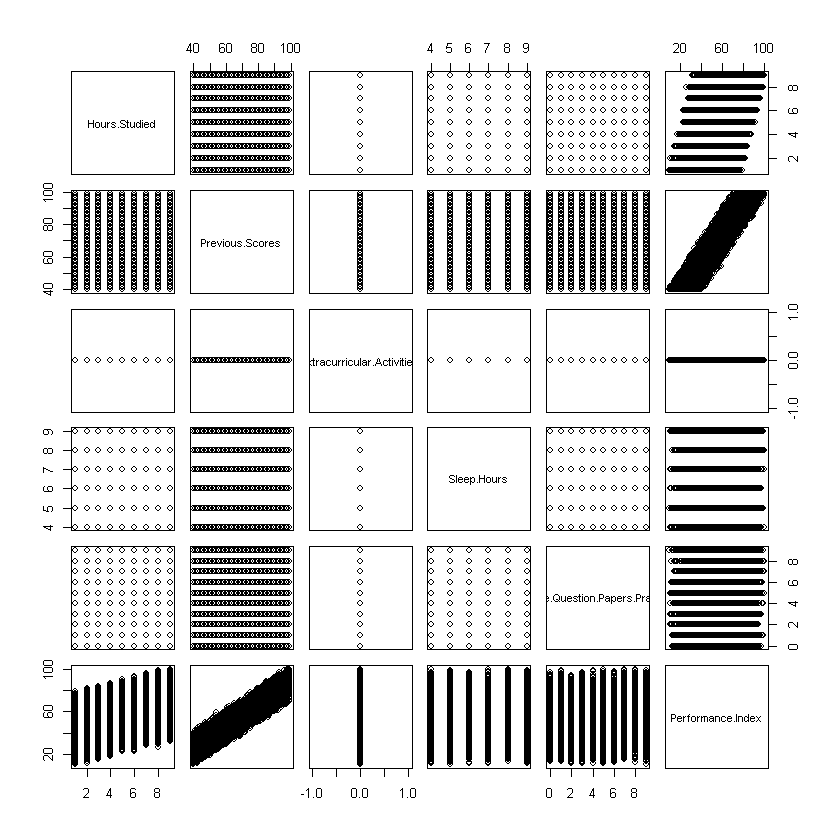

[1] 4630 5323

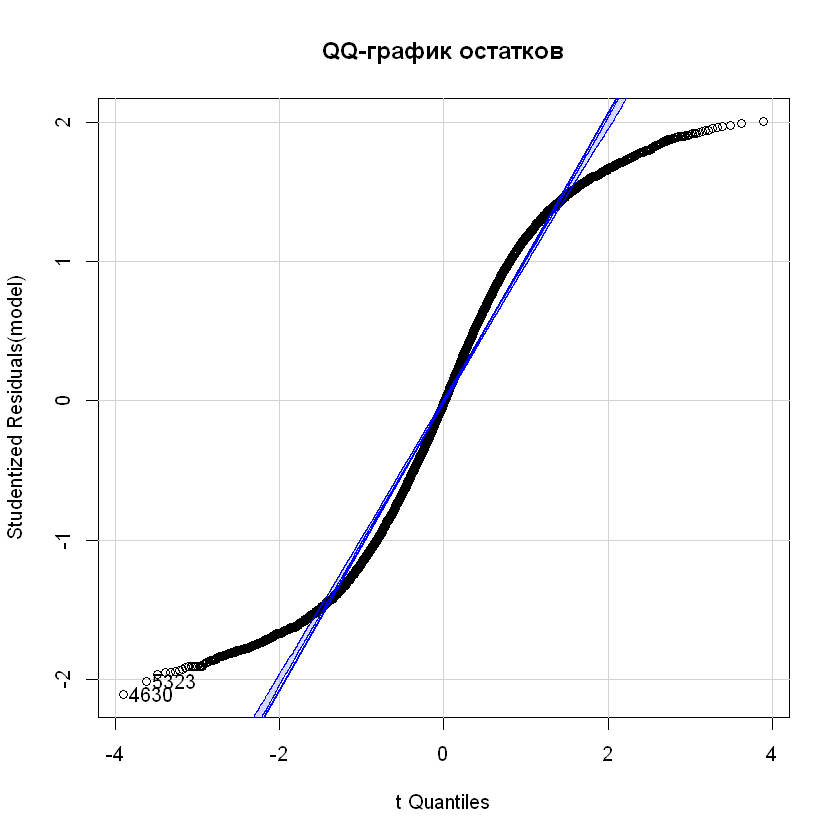

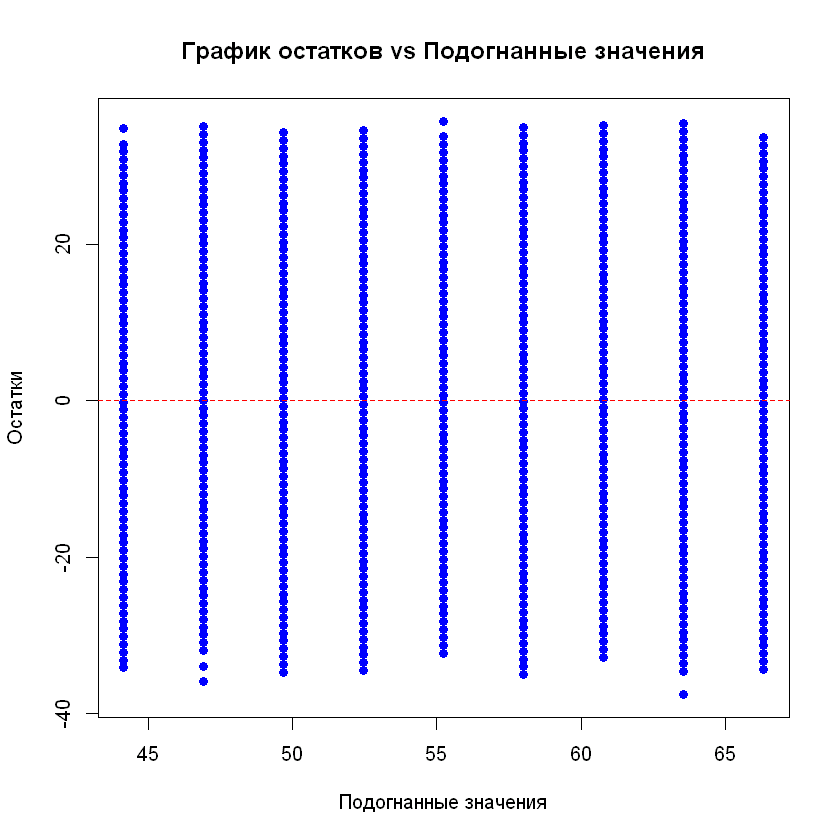

In [178]:
# Остатки
residuals <- residuals(model)
fitted_values <- fitted(model)

# Проверка линейности
pairs(student_df)

# QQ-график остатков
qqPlot(model, main = "QQ-график остатков")

# График остатков против подогнанных значений
plot(fitted_values, residuals, main = "График остатков vs Подогнанные значения",
     xlab = "Подогнанные значения", ylab = "Остатки", pch = 19, col = "blue")
abline(h = 0, col = "red", lty = 2)

_QQ-график показывает отклонение распределения остатков от нормального распределения на хвостах, в то время как в центре графика точки лежат близки к красной линии, что указывает на нормальность остатков в этой части._

_Также график остатков явно сигнализирует о том, что у нас распределение очень похоже на равномерное, что указывает на возможное упущение важных предикторов и нелинейную зависимость между целевой переменной и предиктором._

_Соответственно, линйная модель регрессии может недостаточно хорошо описывать зависимость._

In [180]:
# MSE
mse <- mean(residuals^2)
cat("Mean Squared Error:", mse, "\n")

# R-квадрат
r_squared <- summary(model)$r.squared
cat("R-squared:", r_squared, "\n")

Mean Squared Error: 317.5337 
R-squared: 0.1396744 


**Среднеквадратичная ошибка предсказания**, равная 317,5 означает, что модель плохо справляется с точным прогнозом.

**Коэффициент детерминации R-squared** (около 14%) означает, что модель объясняет только, 14% вариации целевой переменной, это низкое значение говорит о том, что зависимость между целевой перемнной и предиктором слабая и модель не описывает данные достаточно хорошо.

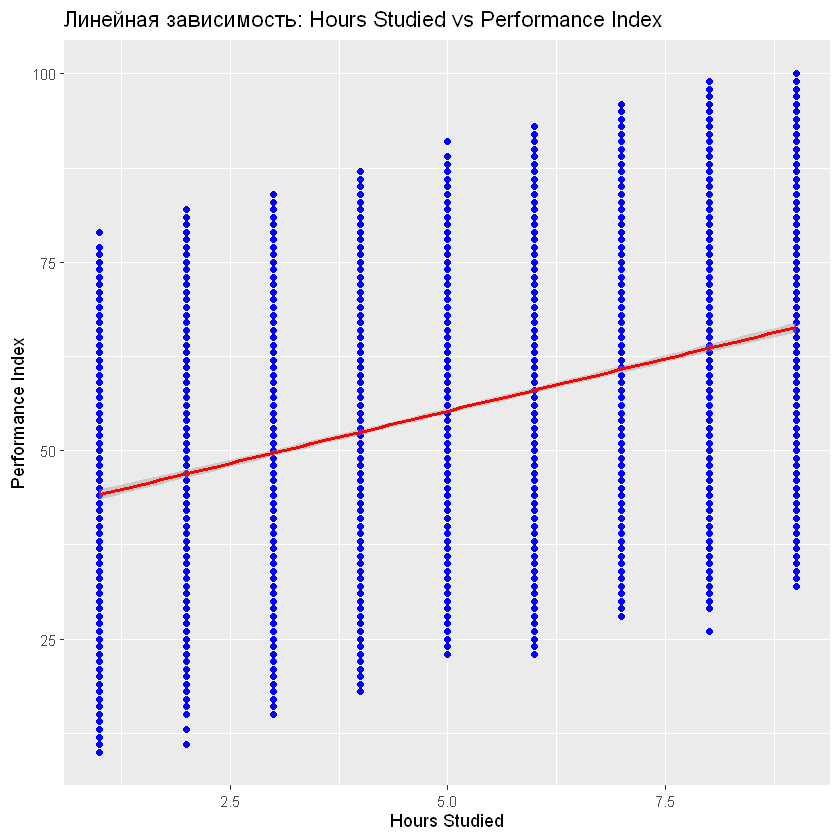

In [191]:
# Линейная зависимость: Hours Studied vs Performance Index
ggplot(student_df, aes(x = Hours.Studied, y = Performance.Index)) +
  geom_point(color = "blue") +
  geom_smooth(formula = y ~ x , method = "lm", color = "red") +
  labs(title = "Линейная зависимость: Hours Studied vs Performance Index",
       x = "Hours Studied", y = "Performance Index")

_Наблюдается **положительная корреляция** между **часами учебы и индексом успеваемости**, что подтверждается красной линией. Но также вариативность данных(точки вертикально расположены) указывает, что **другие переменные тоже значительно влияют** на целевую переменную. Линия регрессии плохо описывает вариации целевой переменной, так как данные сильно сосредоточены вокруг нее. Соответственно, можно сделать вывод о том, что **линейная зависимость одного предиктора недостаточна** для точного описания данных._

_P_value $< 0.05$, что говорит о том, что между индексом успеваемости и часами затраченными на учебу существует статистически значимая связь, но по результатам подгонки выяснилось, что она слабая и незначительная и объясняет только 14% вариации, то есть этой связи может быть недостаточно для точного прогнозирования в дальнейшем._

**Дополнительно:** _хвосты на концах распределения остатков может говорить о выбросах на концах распределения, можно попробовать применить логарифмическое преобазование, чтобы убрать их, посмотрим как поведет себя модель при этом._


Call:
lm(formula = Log_Performance_Index ~ Hours.Studied, data = student_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40485 -0.26202  0.05349  0.30724  0.66201 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.649108   0.007987  456.87   <2e-16 ***
Hours.Studied 0.058326   0.001420   41.07   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3677 on 9998 degrees of freedom
Multiple R-squared:  0.1444,	Adjusted R-squared:  0.1443 
F-statistic:  1687 on 1 and 9998 DF,  p-value: < 2.2e-16


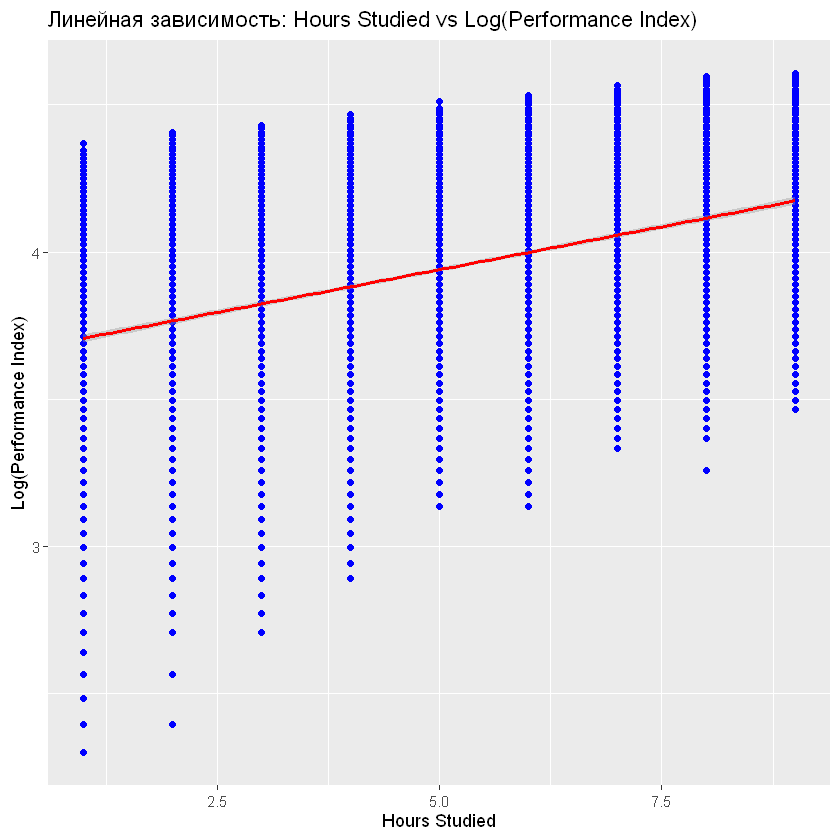

[1]  333 5323

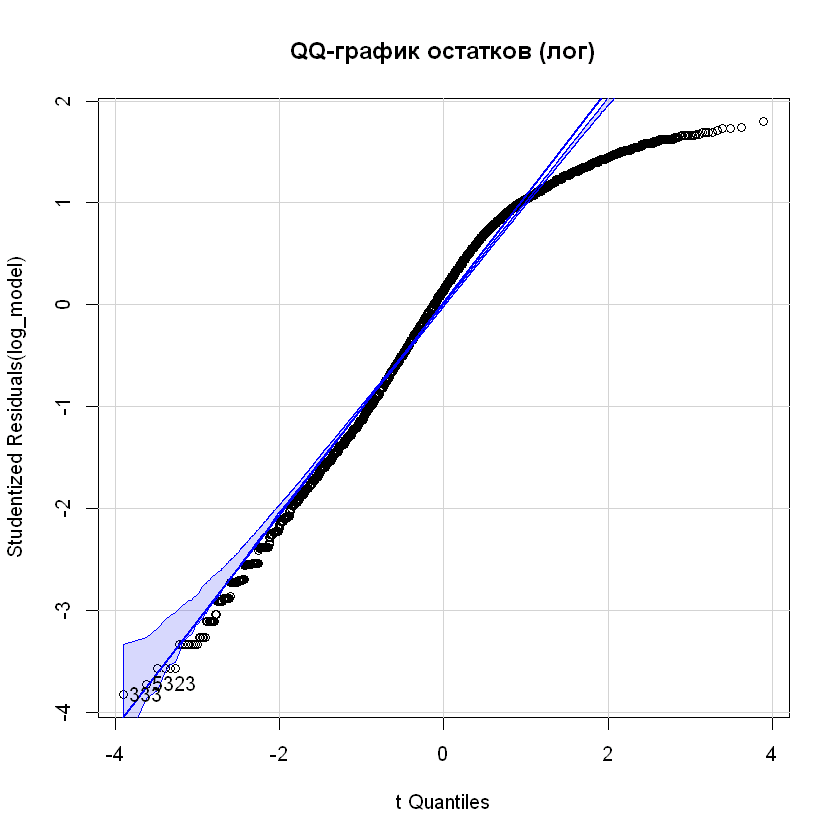

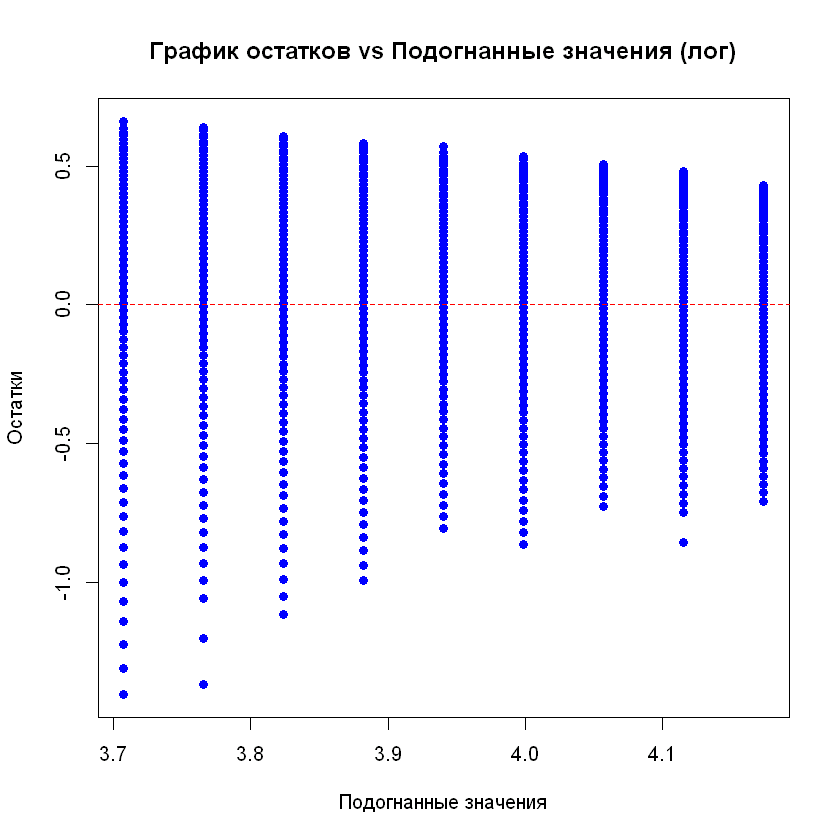

In [216]:
# Логарифмическое преобразование целевой переменной
student_df$Log_Performance_Index <- log(student_df$Performance.Index)

# Строим модель OLS с логарифмированной переменной
log_model <- lm(Log_Performance_Index ~ Hours.Studied, data = student_df)
summary(log_model)

# График линейной зависимости после лог-преобразования
ggplot(student_df, aes(x = Hours.Studied, y = Log_Performance_Index)) +
  geom_point(color = "blue") +
  geom_smooth(formula = y ~ x, method = "lm", color = "red") +
  labs(title = "Линейная зависимость: Hours Studied vs Log(Performance Index)",
       x = "Hours Studied", y = "Log(Performance Index)")

# QQ-график остатков
qqPlot(log_model, main = "QQ-график остатков (лог)")

# График остатков vs предсказанных значений
residuals <- residuals(log_model)
fitted_values <- fitted(log_model)
plot(fitted_values, residuals, main = "График остатков vs Подогнанные значения (лог)",
     xlab = "Подогнанные значения", ylab = "Остатки", pch = 19, col = "blue")
abline(h = 0, col = "red", lty = 2)

In [195]:
# MSE и R-квадрат для лог-преобразованной модели
mse <- mean(residuals^2)
cat("Mean Squared Error (лог):", mse, "\n")
r_squared <- summary(log_model)$r.squared
cat("R-squared (лог):", r_squared, "\n")

Mean Squared Error (лог): 0.1351736 
R-squared (лог): 0.144359 


_В результате преобразования, модель стала лучше в плане минимзации ошибок, оно уменьшило влиние выбросов, что позволило модели лучше предсказывать данные, о чем свидетльствует низкое значений среднеквдаратичной ошибки. В то время, как R-squared возрос не значительно, что продолжает говорить о слабой зависимости между переменными. Один хвост убрался, но второй в верхней части распределения говорит о том, что присутствуют выбросы с которыми модель не может справиться._

**_Возьмем теперь полиномиальную регрессию и проверим качество предсказания на ней._**

*Проверим качество при разных степенях полиномов (2, 4)*

**2 cтепень**:

In [200]:
# Полиномиальная регрессия (2 степень)
student_df$Hours_Studied_2 <- student_df$Hours.Studied^2
poly_model_2 <- lm(Performance.Index ~ Hours.Studied + Hours_Studied_2, data = student_df)
summary(poly_model_2)


Call:
lm(formula = Performance.Index ~ Hours.Studied + Hours_Studied_2, 
    data = student_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.485 -15.206  -0.116  15.515  35.533 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     40.77694    0.67359  60.536   <2e-16 ***
Hours.Studied    3.10366    0.31034  10.001   <2e-16 ***
Hours_Studied_2 -0.03314    0.03034  -1.093    0.275    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.82 on 9997 degrees of freedom
Multiple R-squared:  0.1398,	Adjusted R-squared:  0.1396 
F-statistic: 812.2 on 2 and 9997 DF,  p-value: < 2.2e-16


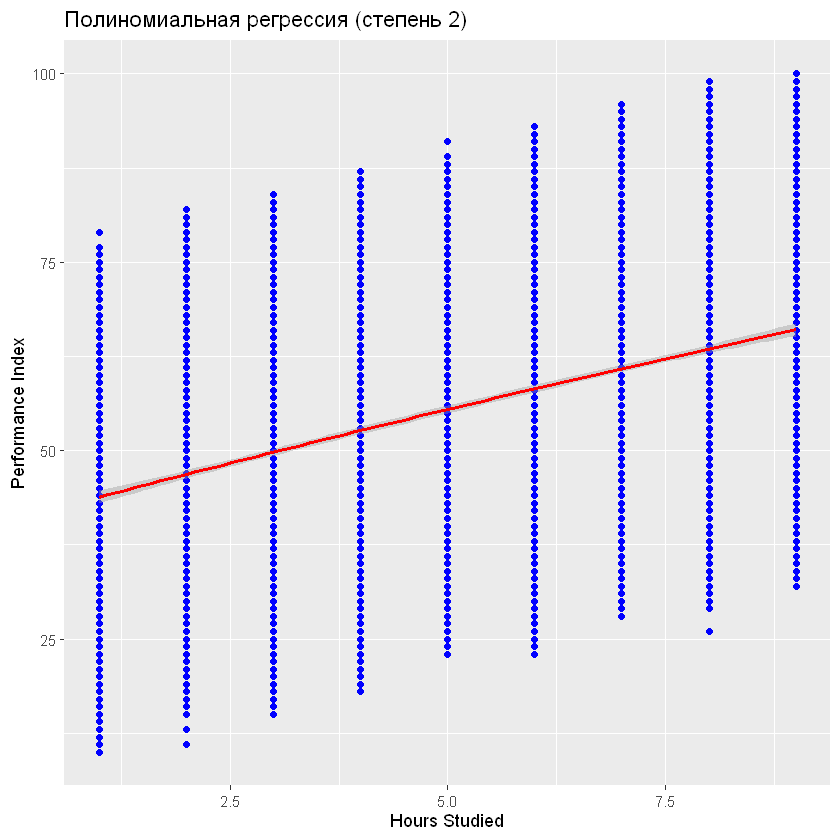

In [199]:
# График полиномиальной регрессии (2 степень)
ggplot(student_df, aes(x = Hours.Studied, y = Performance.Index)) +
  geom_point(color = "blue") +
  stat_smooth(method = "lm", formula = y ~ poly(x, 2), color = "red") +
  labs(title = "Полиномиальная регрессия (степень 2)",
       x = "Hours Studied", y = "Performance Index")

In [205]:
# MSE и R-квадрат для полиномиальной модели (2 степень)
mse_poly <- mean(residuals(poly_model_2)^2)
r_squared_poly <- summary(poly_model_2)$r.squared
cat("Mean Squared Error (полиномиальная, степень 2):", mse_poly, "\n")
cat("R-squared (полиномиальная, степень 2):", r_squared_poly, "\n")

Mean Squared Error (полиномиальная, степень 2): 317.4958 
R-squared (полиномиальная, степень 2): 0.1397771 


**4 степень:**

In [206]:
# Полиномиальная регрессия (4 степень)
student_df$Hours_Studied_3 <- student_df$Hours.Studied^3
student_df$Hours_Studied_4 <- student_df$Hours.Studied^4
poly_model_4 <- lm(Performance.Index ~ Hours.Studied + Hours_Studied_2 + Hours_Studied_3 + Hours_Studied_4, data = student_df)
summary(poly_model_4)


Call:
lm(formula = Performance.Index ~ Hours.Studied + Hours_Studied_2 + 
    Hours_Studied_3 + Hours_Studied_4, data = student_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.503 -15.314  -0.163  15.497  35.497 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     41.640150   2.048109  20.331   <2e-16 ***
Hours.Studied    2.134394   2.521877   0.846    0.397    
Hours_Studied_2  0.271172   0.957032   0.283    0.777    
Hours_Studied_3 -0.035525   0.140555  -0.253    0.800    
Hours_Studied_4  0.001373   0.006996   0.196    0.844    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.82 on 9995 degrees of freedom
Multiple R-squared:  0.1398,	Adjusted R-squared:  0.1395 
F-statistic: 406.1 on 4 and 9995 DF,  p-value: < 2.2e-16


In [208]:
# MSE и R-квадрат для полиномиальной модели (4 степень)
mse_poly_4 <- mean(residuals(poly_model_4)^2)
r_squared_poly_4 <- summary(poly_model_4)$r.squared
cat("Mean Squared Error (полиномиальная, степень 4):", mse_poly_4, "\n")
cat("R-squared (полиномиальная, степень 4):", r_squared_poly_4, "\n")

Mean Squared Error (полиномиальная, степень 4): 317.4841 
R-squared (полиномиальная, степень 4): 0.1398087 


_Можно заметить, что качество предсказания разных степеней полиномов мало отличаются. Также показатели полиномиальной регрессии и построенной ранее линейной регресии не отличаются._

***Тест 2:***

_Предыдущая подгонка показала слабую зависимость одного предиктора (часы учебы) на индекс успеваемости. Добавим теперь **несколько предикторов** и подгоним **модель линейной регрессии с несколькими предикторами и посмотрим на качество данной аппроксимации**._

In [223]:
# install.packages("GGally")

# Загрузка библиотек
library(dplyr)
library(ggplot2)
library(car)
library(MASS)
library(GGally)
library(corrplot)

colnames(student_df)

# Выбираем независимые переменные и целевую
X <- student_df[, c("Hours.Studied", "Previous.Scores", "Extracurricular.Activities", "Sleep.Hours","Sample.Question.Papers.Practiced")]
y <- student_df$Performance.Index

# Строим модель OLS
model <- lm(Performance.Index ~ Hours.Studied + Previous.Scores + Extracurricular.Activities +
            Sleep.Hours + Sample.Question.Papers.Practiced, data = student_df) 
summary(model)

[1] "Hours.Studied"                    "Previous.Scores"                 
 [3] "Extracurricular.Activities"       "Sleep.Hours"                     
 [5] "Sample.Question.Papers.Practiced" "Performance.Index"               
 [7] "Log_Performance_Index"            "Hours_Studied_2"                 
 [9] "Hours_Studied_3"                  "Hours_Studied_4"


Call:
lm(formula = Performance.Index ~ Hours.Studied + Previous.Scores + 
    Extracurricular.Activities + Sleep.Hours + Sample.Question.Papers.Practiced, 
    data = student_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3299 -1.3831 -0.0062  1.3701  8.4864 

Coefficients: (1 not defined because of singularities)
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -33.763726   0.126841 -266.19   <2e-16 ***
Hours.Studied                      2.853429   0.007962  358.40   <2e-16 ***
Previous.Scores                    1.018584   0.001189  857.02   <2e-16 ***
Extracurricular.Activities               NA         NA      NA       NA    
Sleep.Hours                        0.476333   0.012153   39.19   <2e-16 ***
Sample.Question.Papers.Practiced   0.195198   0.007189   27.15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.061 on 9995 degrees of freedom
Multiple R-s

Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"


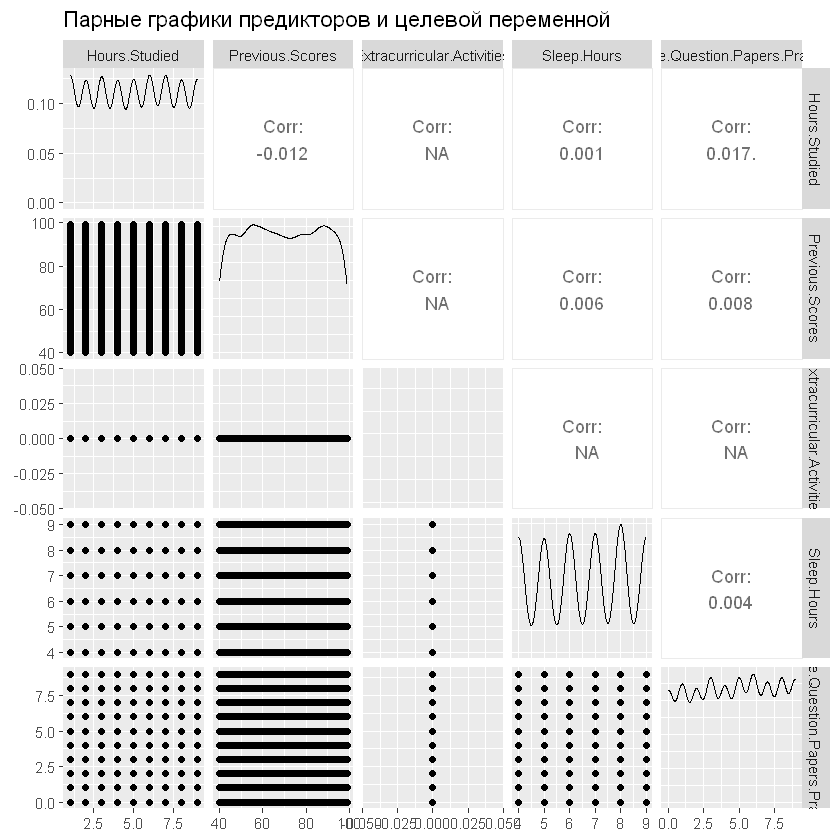

[1]  687 6977

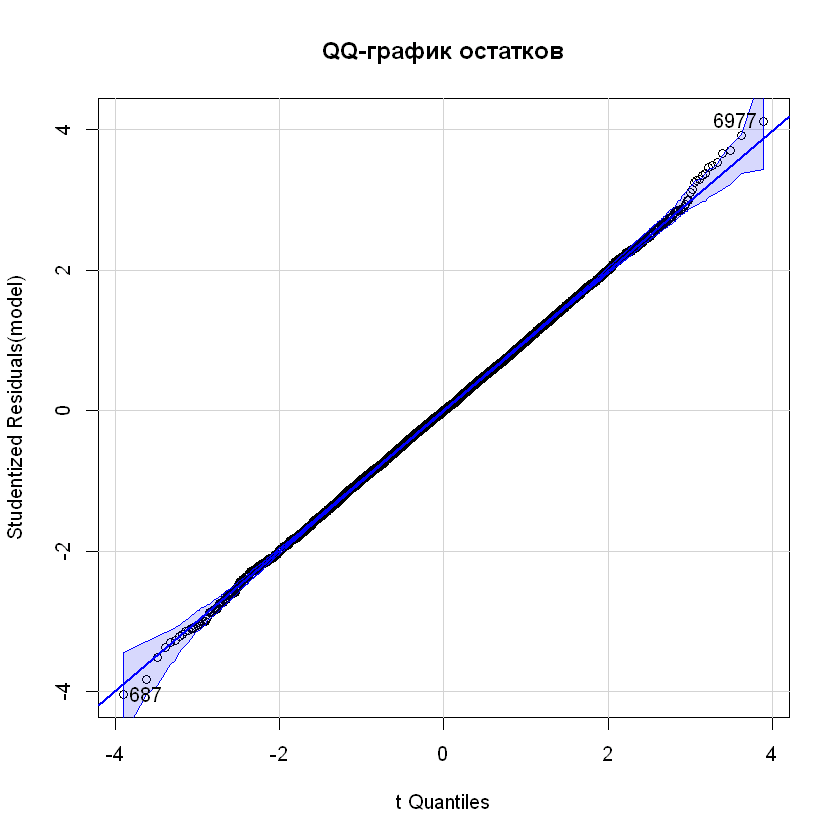

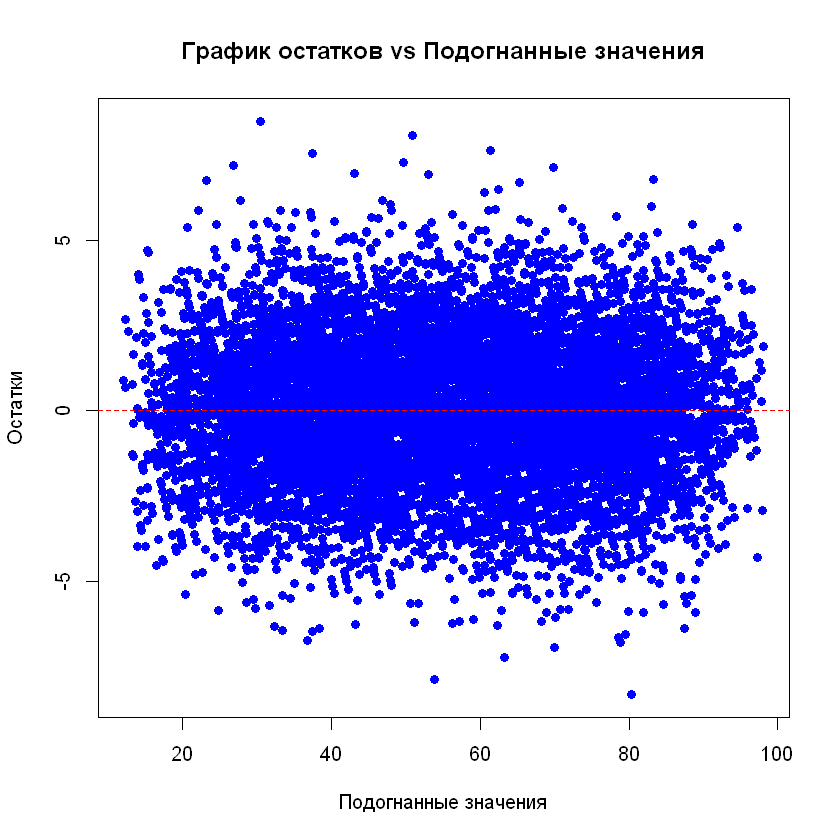

In [227]:
# Остатки и предсказанные значения
residuals <- residuals(model)
fitted_values <- fitted(model)

# Парные графики для проверки линейности
ggpairs(student_df[, c("Hours.Studied", "Previous.Scores", "Extracurricular.Activities", "Sleep.Hours","Sample.Question.Papers.Practiced")], 
        title = "Парные графики предикторов и целевой переменной")

# QQ-график остатков для проверки нормальности
qqPlot(model, main = "QQ-график остатков")

# График остатков против подогнанных значений
plot(fitted_values, residuals, main = "График остатков vs Подогнанные значения",
     xlab = "Подогнанные значения", ylab = "Остатки", pch = 19, col = "blue")
abline(h = 0, col = "red", lty = 2)

In [228]:
# MSE
mse <- mean(residuals^2)
cat("Mean Squared Error:", mse, "\n")

# R-квадрат
r_squared <- summary(model)$r.squared
cat("R-squared:", r_squared, "\n")

Mean Squared Error: 4.245176 
R-squared: 0.9884981 


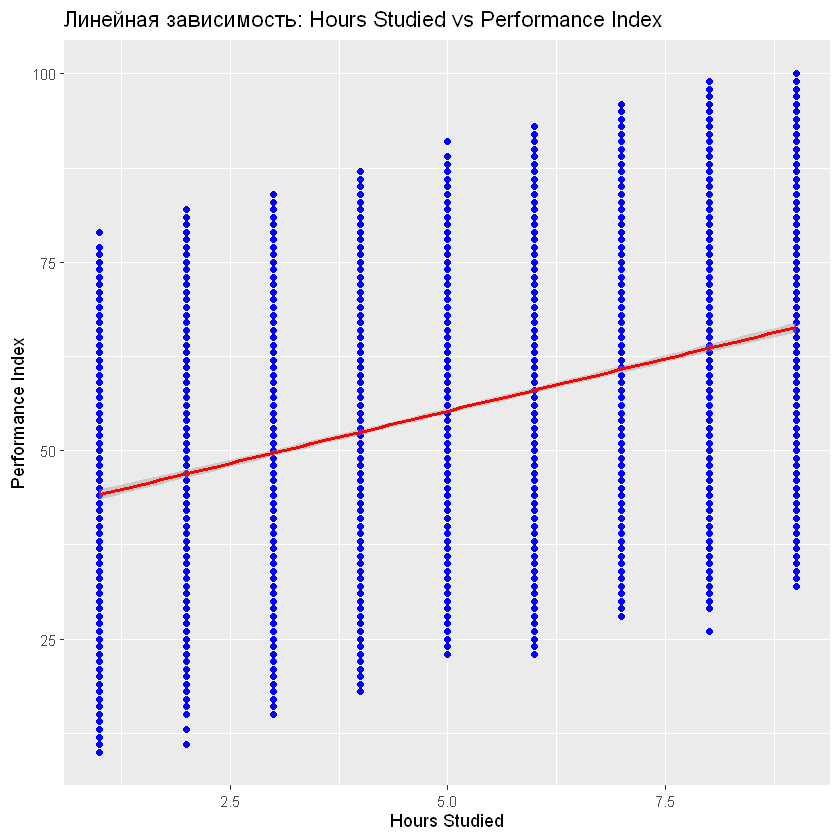

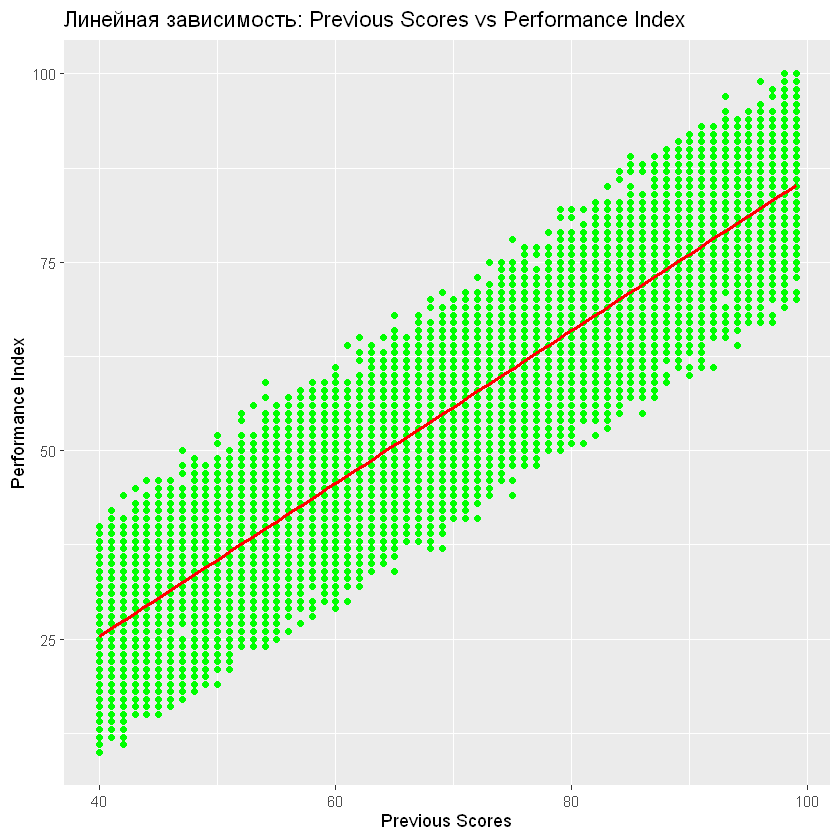

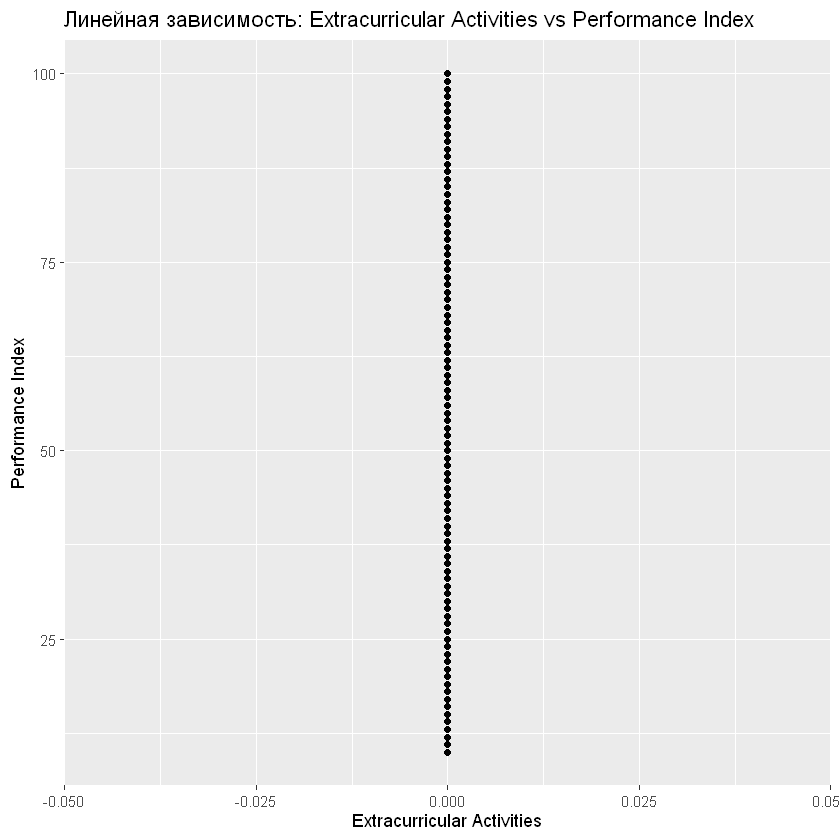

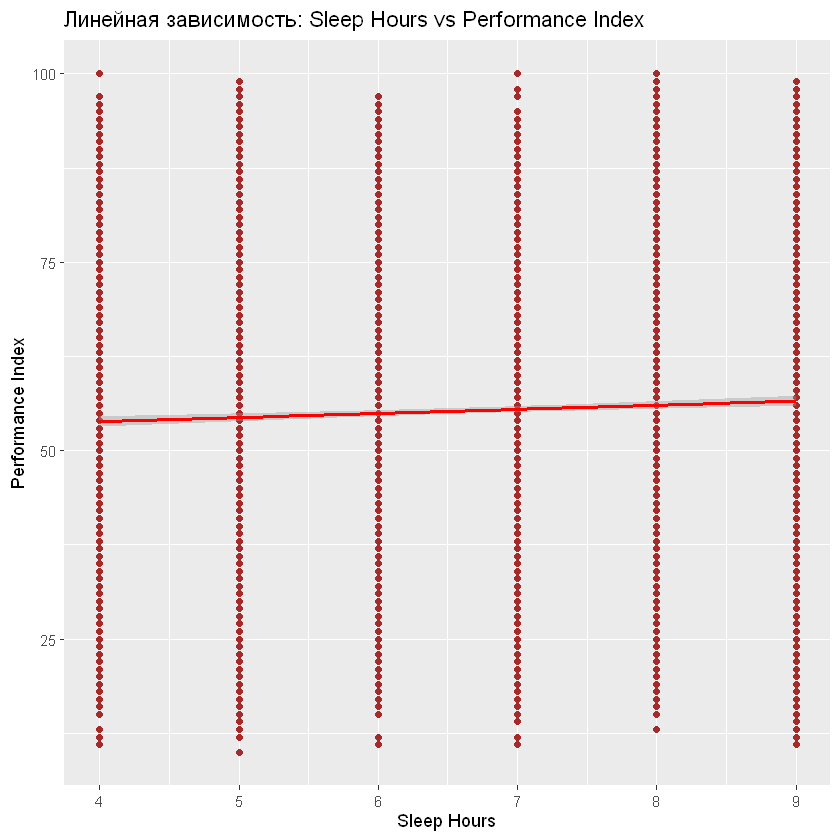

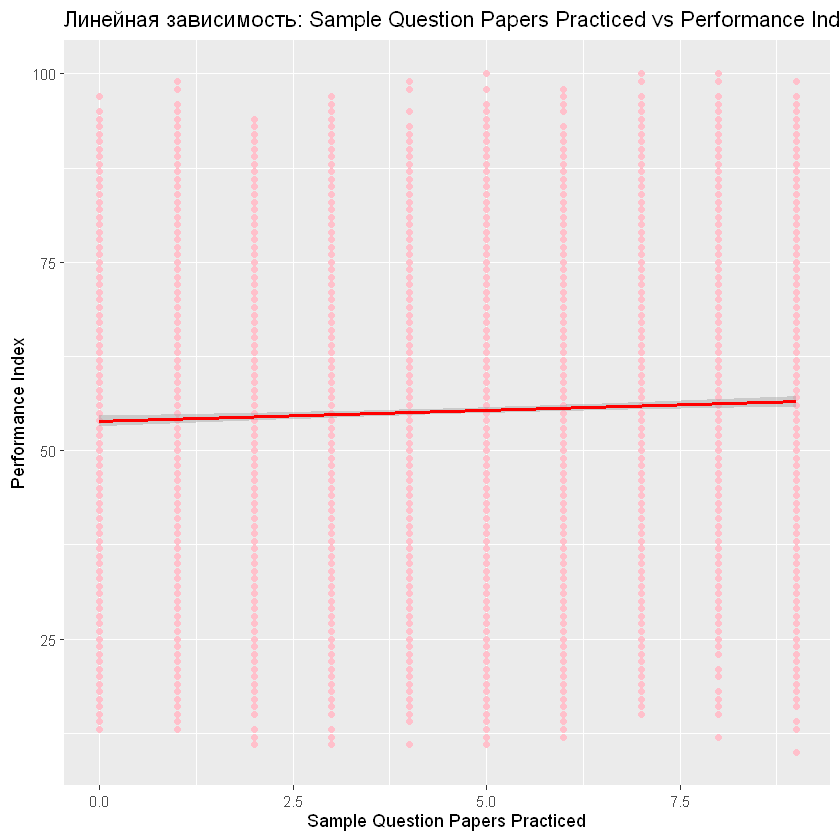

In [237]:
# Построение графиков зависимости целевой переменной от каждого предиктора
ggplot(student_df, aes(x = Hours.Studied, y = Performance.Index)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red") +
  labs(title = "Линейная зависимость: Hours Studied vs Performance Index",
       x = "Hours Studied", y = "Performance Index")

ggplot(student_df, aes(x = Previous.Scores, y = Performance.Index)) +
  geom_point(color = "green") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red") +
  labs(title = "Линейная зависимость: Previous Scores vs Performance Index",
       x = "Previous Scores", y = "Performance Index")

ggplot(student_df, aes(x = Extracurricular.Activities, y = Performance.Index)) +
  geom_point(color = "black") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red") +
  labs(title = "Линейная зависимость: Extracurricular Activities vs Performance Index",
       x = "Extracurricular Activities", y = "Performance Index")

ggplot(student_df, aes(x = Sleep.Hours, y = Performance.Index)) +
  geom_point(color = "brown") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red") +
  labs(title = "Линейная зависимость: Sleep Hours vs Performance Index",
       x = "Sleep Hours", y = "Performance Index")

ggplot(student_df, aes(x = Sample.Question.Papers.Practiced, y = Performance.Index)) +
  geom_point(color = "pink") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red") +
  labs(title = "Линейная зависимость: Sample Question Papers Practiced vs Performance Index",
       x = "Sample Question Papers Practiced", y = "Performance Index")


Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"


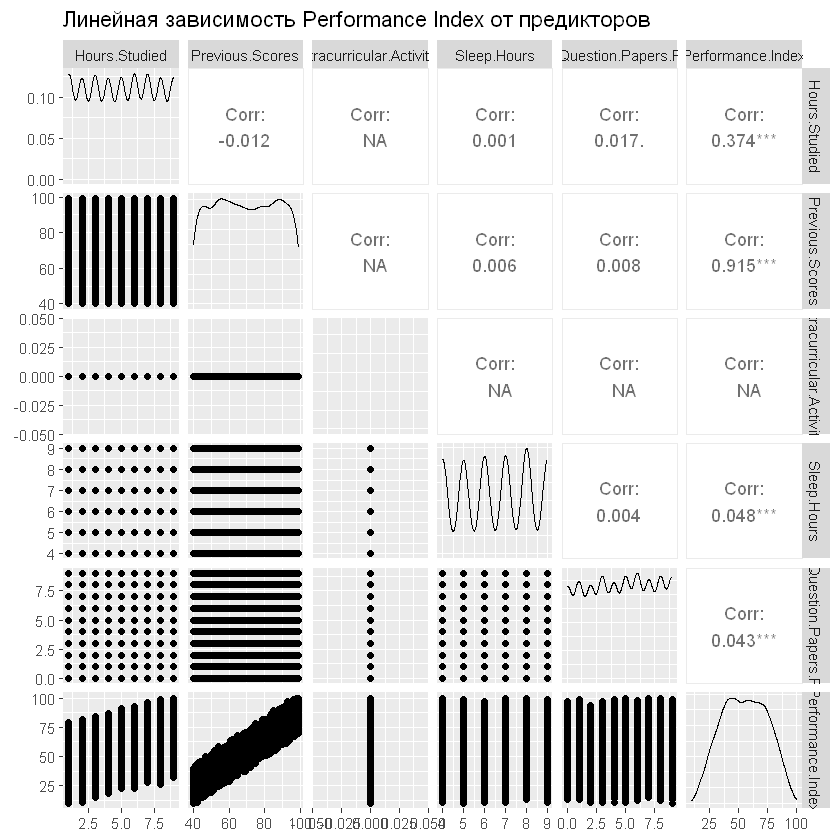

In [236]:
# Построение парных графиков
ggpairs(data = student_df, 
        columns = c("Hours.Studied", "Previous.Scores", "Extracurricular.Activities", 
                    "Sleep.Hours", "Sample.Question.Papers.Practiced", "Performance.Index"),
        title = "Линейная зависимость Performance Index от предикторов")

In [313]:
# Проверяем зависимость между предикторами
alias(model)
# Если зависимость обнаружена, вручную удаляем одну из зависимых переменных # Например, убираем одну переменную и пересчитываем модель 

Model :
Performance.Index ~ Previous.Scores


In [314]:
model_corrected <- lm(Performance.Index ~ Hours.Studied + Previous.Scores + 
                      Sleep.Hours + Sample.Question.Papers.Practiced, data = student_df) 

# Рассчитываем VIF для исправленной модели 
# Проверка мультиколлинеарности с помощью VIF
library(car)
vif_values <- vif(model_corrected) 
vif_data <- data.frame(Feature = names(vif_values), VIF = vif_values) 
print(vif_data)

                                                          Feature      VIF
Hours.Studied                                       Hours.Studied 1.000464
Previous.Scores                                   Previous.Scores 1.000254
Sleep.Hours                                           Sleep.Hours 1.000052
Sample.Question.Papers.Practiced Sample.Question.Papers.Practiced 1.000386


По результатам подгонки многомерной линейной регрессии(несколько предикторов) можно сделать вывод о том, что влияние нескольких предикторов одновременно на целевую переменную оказывает существенный эффект, чем их влияние по отдельности, что можно увидеть из каждых отдельных графиков.
Переменная `Extracurricular.Activities` имеет особенности. 

**Наиболее значимая линейная зависиммость от предиктора `Previous Scores` подчеркивает сильную связь между предыдущими результатми учеников с их индексом успеваемости.**

_Значения p_value продолжают говорить о статистической значимой зависимости целевой переменной от предикторов._

* _Коэффициент детеминации R-squared (около 0.99 -> 99%) означает, что модель хорошо описывает и прогнозирует 99% всей вариации целевой переменной, что значительно улучшает качество модели._ 

* _Среднеквадратичная ошибка около 4.15 указывает, что модель прогонозирует с некоторой погрешностью, но это погрешность незначительна(Как в предыдущей подгонке линейной регресии после логарифмического преобразования подозреваю, что она также снизится, если его применить ко всем предикторам)._

* _По графикам видно (QQ-график) - распределение остатков совпадает с нормальным распределением, есть незначительные отклонения на концах, но они незначительные. А также случаный разброс остатков подтверждает, что допущение гомоскедотатичности не нарушено. Мультиколлинеарность отсутствует, и есть линейная зависимость целевой переменной от предикторов, что означает **надежность вывода модели.**_

***Тест 3:***

Подгоним линейную регрессионую модель, используя предиктор `Previous Scores` к целевой переменной `Perfomance Index`.

In [20]:
# install.packages("polynom")

# Загрузка библиотек
library(ggplot2)
library(dplyr)
library(MASS)
library(car)
library(caret)
library(polynom)
library(Metrics)
library(GGally)

# Выбираем предиктор и целевую переменную
X <- student_df[, "Previous.Scores", drop = FALSE]
y <- student_df$Performance.Index

# Строим модель OLS
model <- lm(Performance.Index ~ Previous.Scores, data = student_df)
summary(model)


Call:
lm(formula = Performance.Index ~ Previous.Scores, data = student_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7729  -6.5239  -0.0082   6.3689  19.4346 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -15.181799   0.319605   -47.5   <2e-16 ***
Previous.Scores   1.013837   0.004465   227.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.744 on 9998 degrees of freedom
Multiple R-squared:  0.8376,	Adjusted R-squared:  0.8376 
F-statistic: 5.156e+04 on 1 and 9998 DF,  p-value: < 2.2e-16


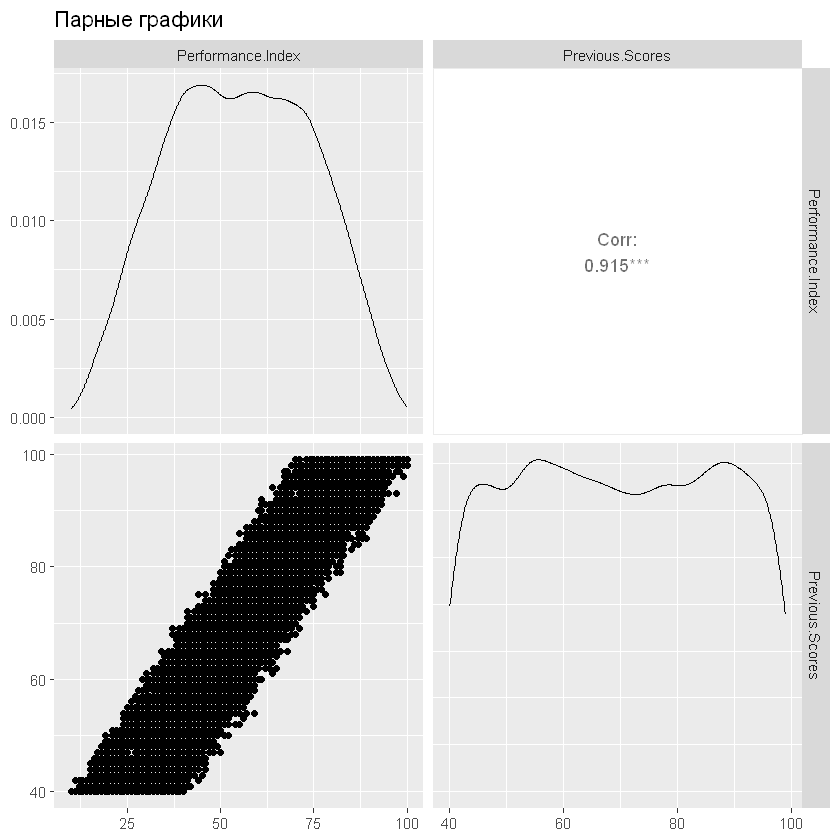

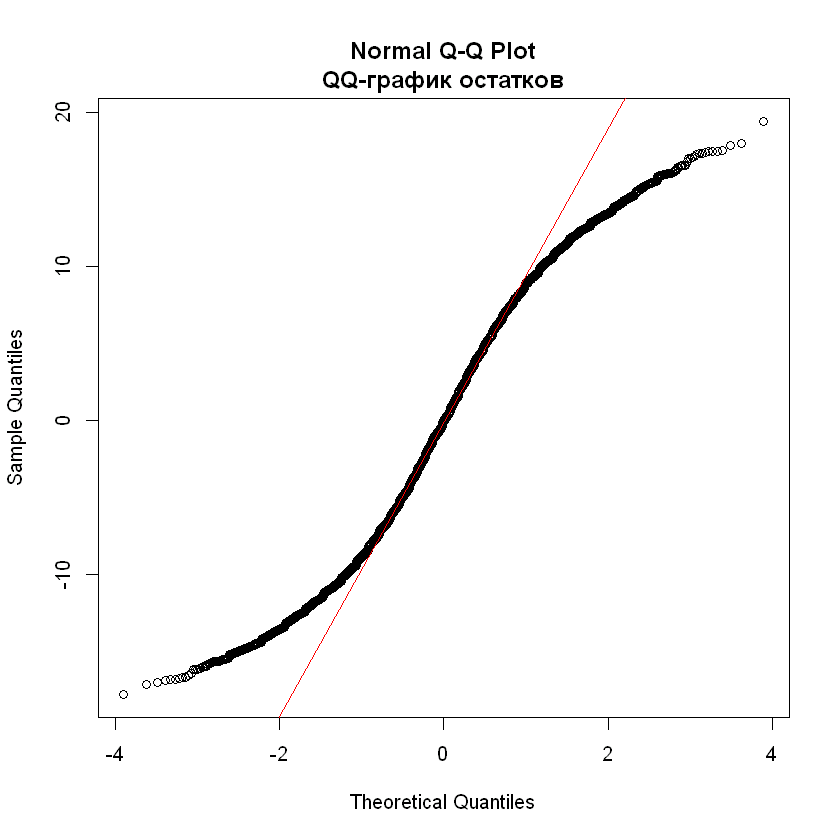

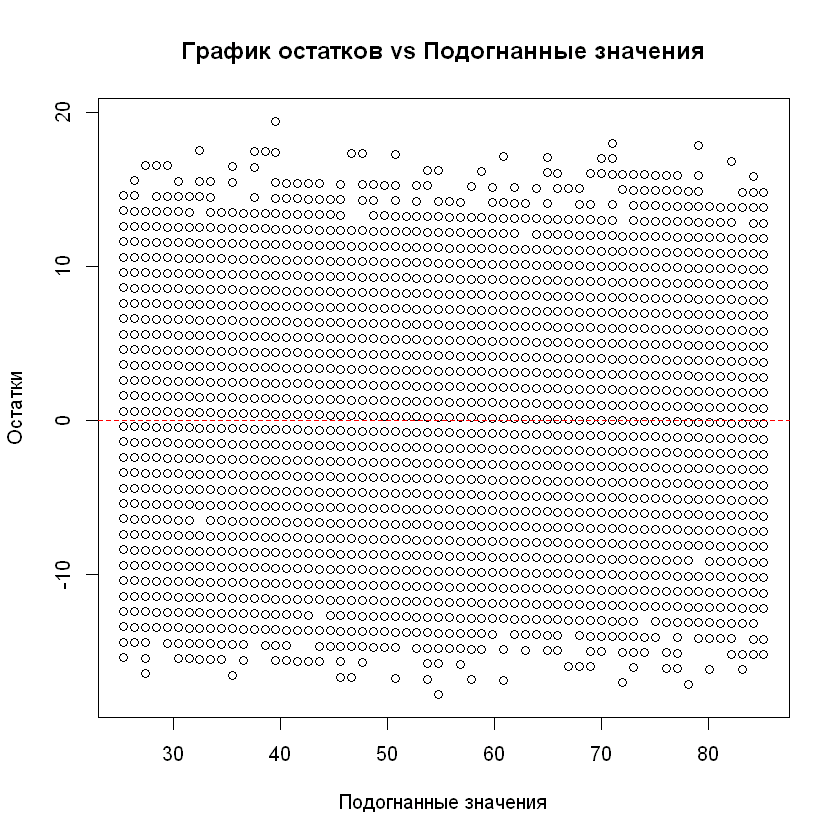

In [22]:
# Остатки и подогнанные значения
residuals <- residuals(model)
fitted_values <- fitted(model)

# Парные графики для проверки линейности
ggpairs(student_df[, c("Performance.Index", "Previous.Scores")], title = "Парные графики")

# QQ-график остатков для проверки нормальности
qqnorm(residuals)
qqline(residuals, col = "red")
title("\n\nQQ-график остатков")

# График остатков против подогнанных значений
plot(fitted_values, residuals, main = "График остатков vs Подогнанные значения", 
     xlab = "Подогнанные значения", ylab = "Остатки")
abline(h = 0, col = "red", lty = 2)

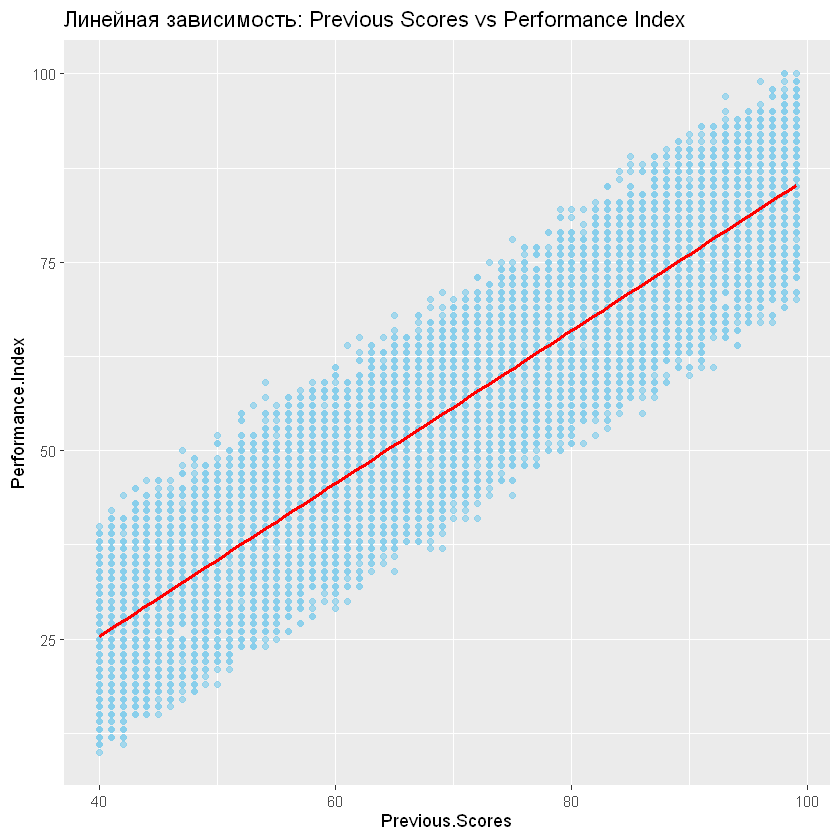

In [24]:
# Линейная зависимость
ggplot(student_df, aes(x = Previous.Scores, y = Performance.Index)) +
  geom_point(color = "skyblue", alpha = 0.7) +
  geom_smooth(formula = y ~ x, method = "lm", color = "red") +
  labs(title = "Линейная зависимость: Previous Scores vs Performance Index")

_QQ-график показывает отклонение распределения остатков от нормального распределения на хвостах, в то время как в центре графика точки лежат близки к красной линии, что указывает на нормальность остатков в этой части._

_Также график остатков явно сигнализирует о том, что у нас распределение очень похоже на равномерное, что указывает на возможное упущение важных предикторов и нелинейную зависимость между целевой переменной и предиктором._

_Соответственно, линйная модель регрессии может недостаточно хорошо описывать зависимость._

In [27]:
# MSE
mse <- mean((y - fitted_values)^2)
cat("Mean Squared Error:", mse, "\n")

# R-квадрат
r_squared <- summary(model)$r.squared
cat("R-squared:", r_squared, "\n")

Mean Squared Error: 59.95012 
R-squared: 0.8375712 


* Между предиктором и целевой переменной есть стастическая связь, но она 
* _По итогу видна линейная зависимость между предиктором и целевой переменной, распределение имеет тяжелые хвосты, что говорит о том, что некоторые остатки являются аномалиями._ 

* _График остаточных значений тоже демонстрирует симметрию остатков, что наталкивает на мысль о равномерном распределении._ 

* _Хороший коэффициент детерминации, но огромная среднеквадратичная ошибка, говоращая о том, что модель допускает сербезные ошибки в прогнозе дают повод понять, что модель допускает серьезные ошибки при прогнозах._ 

_**Вывод модели может быть не надежным, но по сравнению с другими предикторами он явялется наиболе достоверным.**_

_**Дополнительно**: Логарифмическое преобразование_


Call:
lm(formula = Log_Performance_Index ~ Previous.Scores, data = student_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04125 -0.11149  0.01237  0.13380  0.45010 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.5335558  0.0076742   330.1   <2e-16 ***
Previous.Scores 0.0202571  0.0001072   188.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1859 on 9998 degrees of freedom
Multiple R-squared:  0.7812,	Adjusted R-squared:  0.7812 
F-statistic: 3.57e+04 on 1 and 9998 DF,  p-value: < 2.2e-16


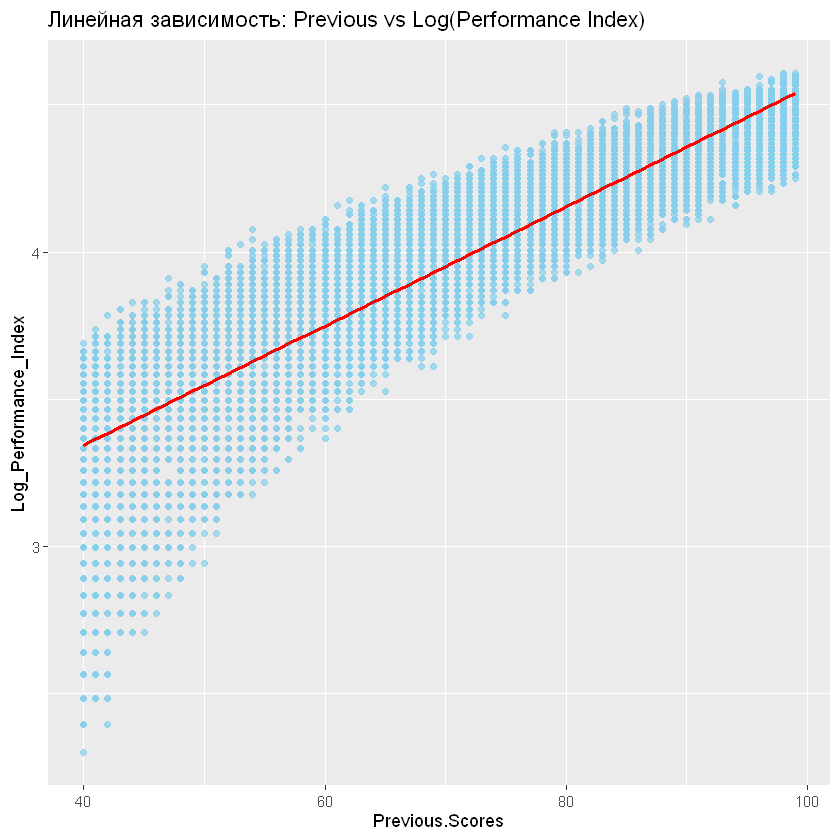

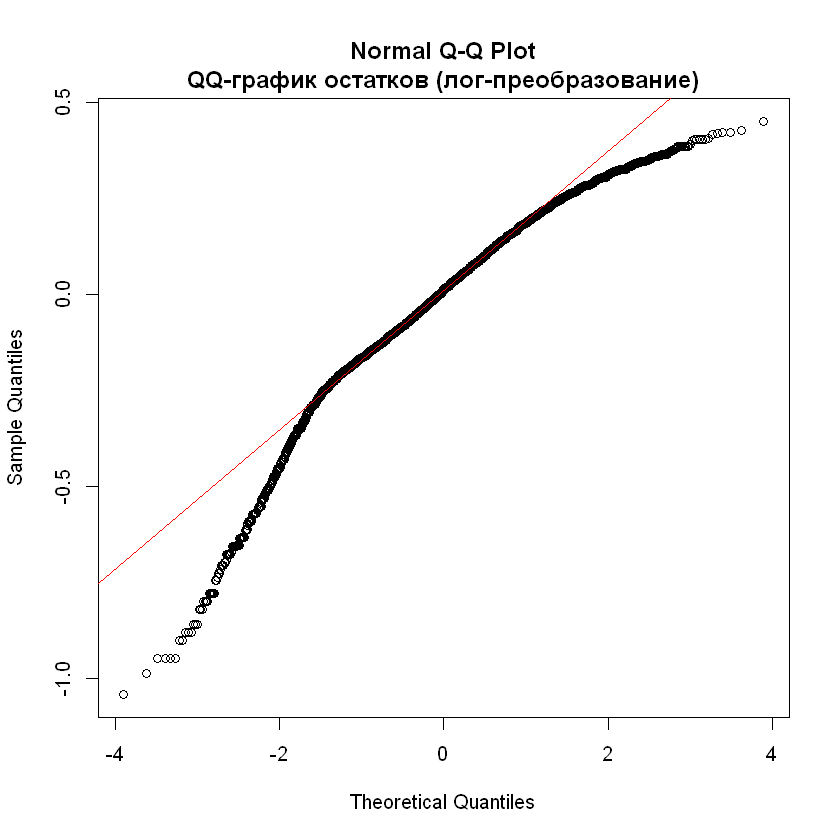

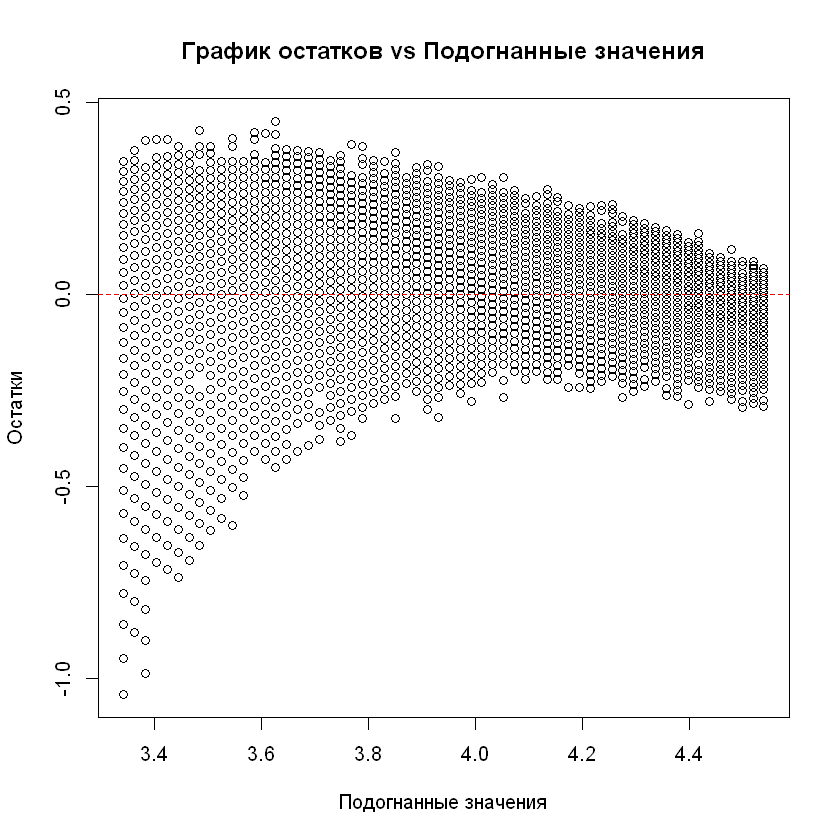

In [33]:
# Логарифмическое преобразование целевой переменной
student_df$Log_Performance_Index <- log(student_df$Performance.Index)
y <- student_df$Log_Performance_Index

# Строим модель OLS для логарифмической целевой переменной
log_model <- lm(Log_Performance_Index ~ Previous.Scores, data = student_df)
summary(log_model)

# График линейной зависимости после лог-преобразования
ggplot(student_df, aes(x = Previous.Scores, y = Log_Performance_Index)) +
  geom_point(color = "skyblue", alpha = 0.7) +
  geom_smooth(formula = y ~ x, method = "lm", color = "red") +
  labs(title = "Линейная зависимость: Previous vs Log(Performance Index)")

# QQ-график остатков
residuals_log <- residuals(log_model)
qqnorm(residuals_log)
qqline(residuals_log, col = "red")
title("\n\nQQ-график остатков (лог-преобразование)")

# График остатков против подогнанных значений
fitted_values_log <- fitted(log_model)
plot(fitted_values_log, residuals_log, main = "График остатков vs Подогнанные значения", 
     xlab = "Подогнанные значения", ylab = "Остатки")
abline(h = 0, col = "red", lty = 2)

In [292]:
# MSE для лог-преобразования
mse_log <- mean((y - fitted_values_log)^2)
cat("Mean Squared Error (log):", mse_log, "\n")

# R-квадрат для лог-преобразования
r_squared_log <- summary(log_model)$r.squared
cat("R-squared (log):", r_squared_log, "\n")

Mean Squared Error (log): 0.03456479 
R-squared (log): 0.7812069 


_Преобразования улучшили вывод модели, нельзя утверждать о гомоскедостатичности и нормальности распределения, исходя из графиков, но по итогам всех моделей можно смело утверждать, что вывод **данной модели более надежен**, чем вывод, **связанный с другими предикторами**._

По итогу мы отклоняем нулевую гипотезу об отсутствии влияния предиктора на целевую переменную.

**Подгоним теперь полиномиальную регрессию.**


Полиномиальная регрессия: степень 2
MSE: 0.0312243995692983
R2-squared: 0.802351364100641 

Call:
lm(formula = y ~ poly_features)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.91807 -0.11153  0.01025  0.12175  0.49834 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.553e+00  3.087e-02   50.30   <2e-16 ***
poly_features1  5.037e-02  9.263e-04   54.37   <2e-16 ***
poly_features2 -2.167e-04  6.625e-06  -32.70   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1767 on 9997 degrees of freedom
Multiple R-squared:  0.8024,	Adjusted R-squared:  0.8023 
F-statistic: 2.029e+04 on 2 and 9997 DF,  p-value: < 2.2e-16



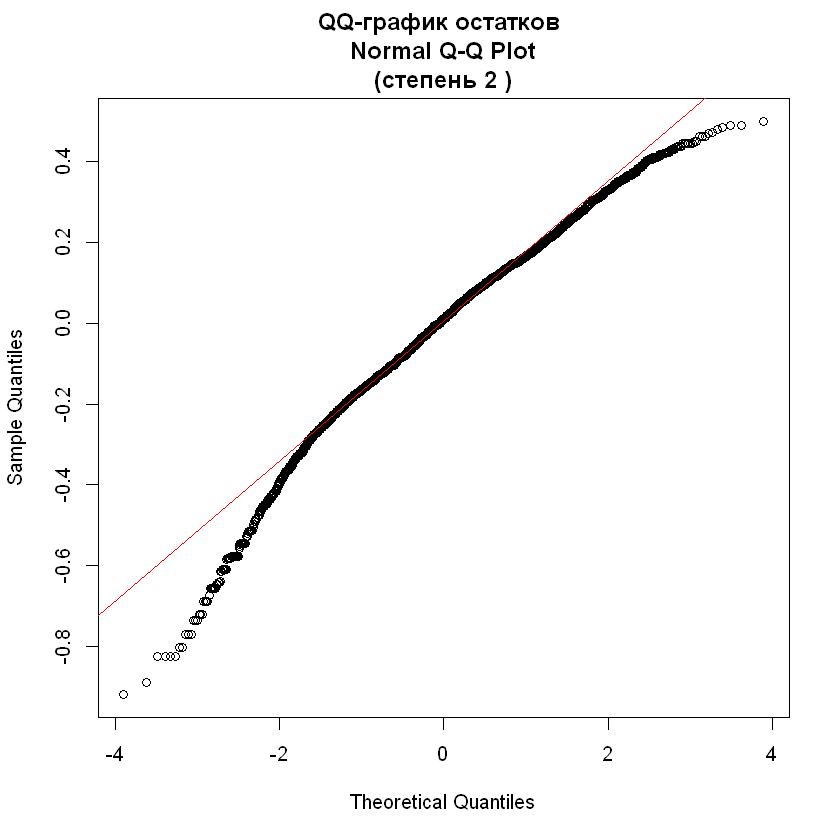


Полиномиальная регрессия: степень 4
MSE: 0.0310176847027242
R2-squared: 0.803659857200974 

Call:
lm(formula = y ~ poly_features)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87309 -0.11176  0.01241  0.12253  0.52242 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.169e+00  5.788e-01  -2.020 0.043385 *  
poly_features1  2.060e-01  3.594e-02   5.732 1.02e-08 ***
poly_features2 -3.416e-03  8.141e-04  -4.196 2.74e-05 ***
poly_features3  2.812e-05  7.988e-06   3.520 0.000433 ***
poly_features4 -8.949e-08  2.870e-08  -3.118 0.001826 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1762 on 9995 degrees of freedom
Multiple R-squared:  0.8037,	Adjusted R-squared:  0.8036 
F-statistic: 1.023e+04 on 4 and 9995 DF,  p-value: < 2.2e-16



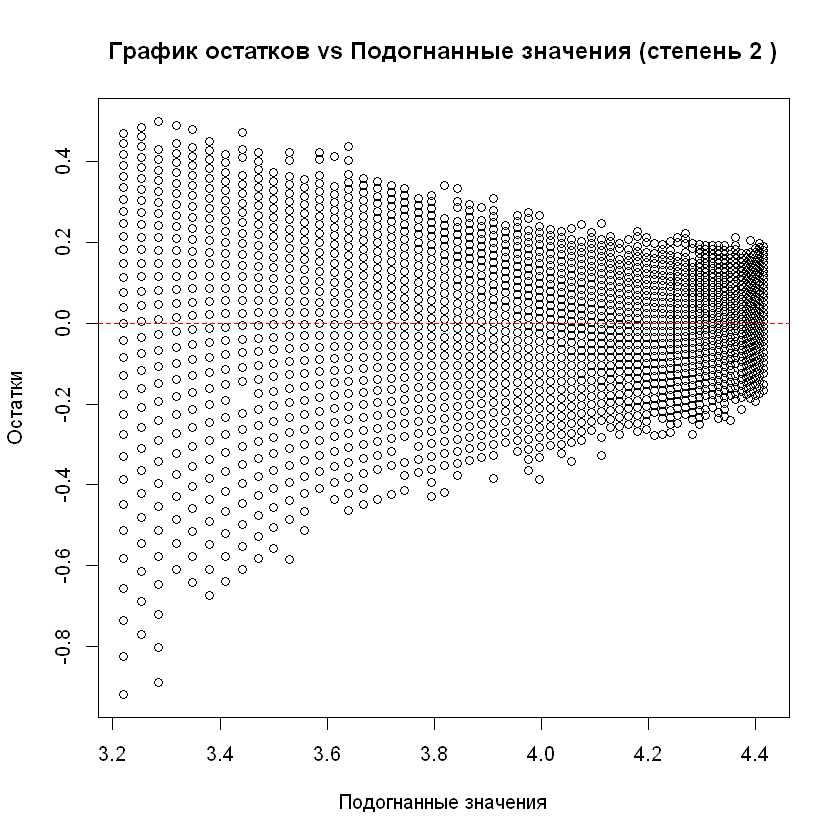

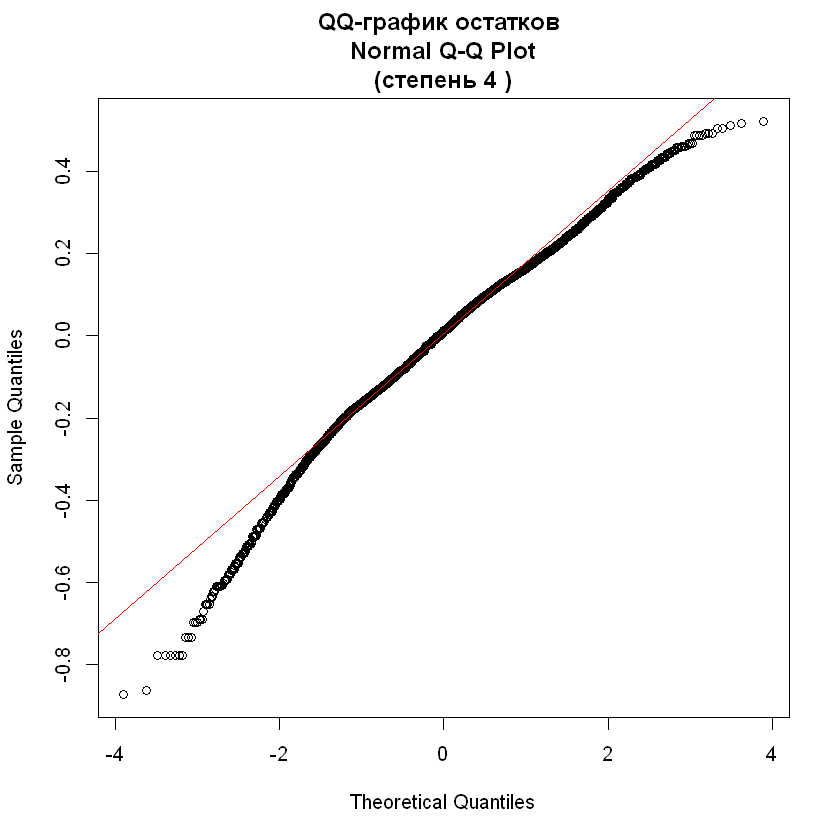


Полиномиальная регрессия: степень 6
MSE: 0.03101477098798
R2-squared: 0.803678300846089 

Call:
lm(formula = y ~ poly_features)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86724 -0.11188  0.01064  0.12242  0.52239 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)
(Intercept)    -8.318e+00  1.121e+01  -0.742    0.458
poly_features1  8.496e-01  1.054e+00   0.806    0.420
poly_features2 -2.701e-02  4.053e-02  -0.666    0.505
poly_features3  4.791e-04  8.166e-04   0.587    0.557
poly_features4 -4.837e-06  9.099e-06  -0.532    0.595
poly_features5  2.612e-08  5.319e-08   0.491    0.623
poly_features6 -5.877e-11  1.275e-10  -0.461    0.645

Residual standard error: 0.1762 on 9993 degrees of freedom
Multiple R-squared:  0.8037,	Adjusted R-squared:  0.8036 
F-statistic:  6818 on 6 and 9993 DF,  p-value: < 2.2e-16



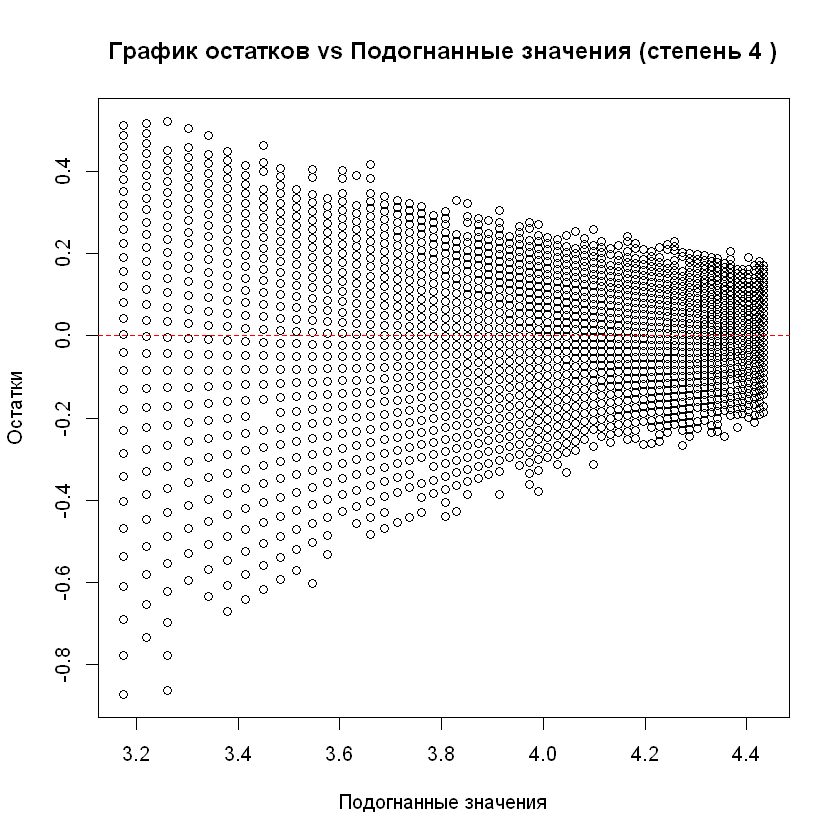

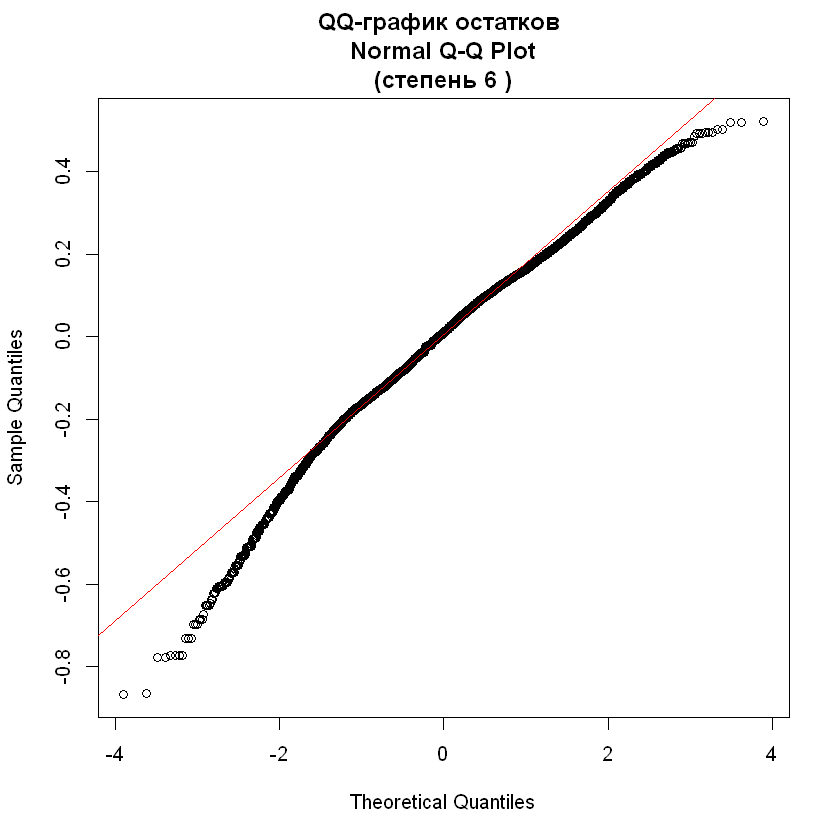

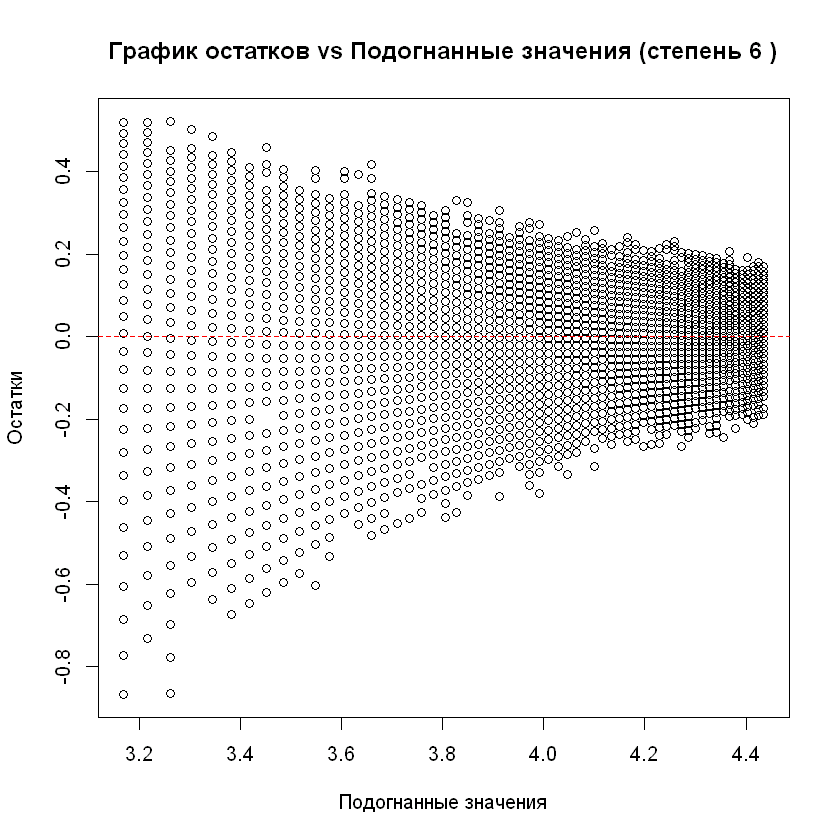

In [299]:
# Преообразуем данные, чтобы подогнать полиномиальную регресиию
fit_polynomial_regression <- function(degree) {
  # Генерация полиномиальных признаков
  poly_features <- poly(X[, "Previous.Scores"], degree = degree, raw = TRUE)
  
  # Создаем модель с полиномиальными признаками
  poly_model <- lm(y ~ poly_features)
  
  # Предсказания модели
  y_pred <- fitted(poly_model)
  
  # Статистики модели
  cat(paste("\nПолиномиальная регрессия: степень", degree))
  cat(paste("\nMSE:", mean((y - y_pred)^2)))
  cat(paste("\nR2-squared:", summary(poly_model)$r.squared, "\n"))
  print(summary(poly_model))
  
  # График полиномиальной зависимости
  ggplot() +
    geom_point(data = student_df, aes(x = Previous.Scores, y = Log_Performance.Index), alpha = 0.5, color = "blue") +
    geom_line(data = student_df, aes(x = Previous.Scores, y = predict(poly_model)), color = "red", alpha = 0.7) +
    labs(title = paste("Полиномиальная регрессия (степень", degree, ")"),
         x = "Previous Scores", y = "Performance Index")
  
  # QQ-график остатков
  residuals_poly <- residuals(poly_model)
  qqnorm(residuals_poly)
  qqline(residuals_poly, col = "red")
  title(paste("QQ-график остатков \n\n(степень", degree, ")"))
  
  # График остатков vs подогнанных значений
  plot(fitted(poly_model), residuals_poly, main = paste("График остатков vs Подогнанные значения (степень", degree, ")"), 
       xlab = "Подогнанные значения", ylab = "Остатки")
  abline(h = 0, col = "red", lty = 2)
}

# Преобразуем X, если это не data.frame
if (!is.data.frame(X)) {
  X <- data.frame(Previous.Scores = X)
}

# Запуск полиномиальной регрессии для степеней 2, 4 и 6
for (degree in c(2, 4, 6)) {
  fit_polynomial_regression(degree)
}

_Видно, что полиномы несколько улучшают коэффициент детерминации, но MSE остается примерной той же._ 
_В целом сильного отличия от вывода с прошлой моделью с логарифмическим преобразованием нет._